In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use('classic')
plt.style.use('seaborn-ticks')
plt.style.use('seaborn-darkgrid')
plt.style.use('dark_background')
pd.set_option('display.max_columns', None)


# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/airlinedelaycauses/DelayedFlights.csv
/kaggle/input/airlinedelaycauses/st99_d00.dbf
/kaggle/input/airlinedelaycauses/st99_d00.shp
/kaggle/input/airlinedelaycauses/st99_d00.shx


In [2]:
data = pd.read_csv('../input/airlinedelaycauses/DelayedFlights.csv')
#Dataset information can be found at http://stat-computing.org/dataexpo/2009/the-data.html

In [3]:
data

,Unnamed: 0,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,0,2008,1,3,4,2003.0,1955,2211.0,2225,WN,335,N712SW,128.0,150.0,116.0,-14.0,8.0,IAD,TPA,810,4.0,8.0,0,N,0,NaN,NaN,NaN,NaN,NaN
1,1,2008,1,3,4,754.0,735,1002.0,1000,WN,3231,N772SW,128.0,145.0,113.0,2.0,19.0,IAD,TPA,810,5.0,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN
2,2,2008,1,3,4,628.0,620,804.0,750,WN,448,N428WN,96.0,90.0,76.0,14.0,8.0,IND,BWI,515,3.0,17.0,0,N,0,NaN,NaN,NaN,NaN,NaN
3,4,2008,1,3,4,1829.0,1755,1959.0,1925,WN,3920,N464WN,90.0,90.0,77.0,34.0,34.0,IND,BWI,515,3.0,10.0,0,N,0,2.0,0.0,0.0,0.0,32.0
4,5,2008,1,3,4,1940.0,1915,2121.0,2110,WN,378,N726SW,101.0,115.0,87.0,11.0,25.0,IND,JAX,688,4.0,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1936753,7009710,2008,12,13,6,1250.0,1220,1617.0,1552,DL,1621,N938DL,147.0,152.0,120.0,25.0,30.0,MSP,ATL,906,9.0,18.0,0,N,0,3.0,0.0,0.0,0.0,22.0
1936754,7009717,2008,12,13,6,657.0,600,904.0,749,DL,1631,N3743H,127.0,109.0,78.0,75.0,57.0,RIC,ATL,481,15.0,34.0,0,N,0,0.0,57.0,18.0,0.0,0.0
1936755,7009718,2008,12,13,6,1007.0,847,1149.0,1010,DL,1631,N909DA,162.0,143.0,122.0,99.0,80.0,ATL,IAH,689,8.0,32.0,0,N,0,1.0,0.0,19.0,0.0,79.0
1936756,7009726,2008,12,13,6,1251.0,1240,1446.0,1437,DL,1639,N646DL,115.0,117.0,89.0,9.0,11.0,IAD,ATL,533,13.0,13.0,0,N,0,NaN,NaN,NaN,NaN,NaN


# Cleaning

In [4]:
data.drop('Unnamed: 0', axis=1, inplace=True)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1936758 entries, 0 to 1936757
Data columns (total 29 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Year               int64  
 1   Month              int64  
 2   DayofMonth         int64  
 3   DayOfWeek          int64  
 4   DepTime            float64
 5   CRSDepTime         int64  
 6   ArrTime            float64
 7   CRSArrTime         int64  
 8   UniqueCarrier      object 
 9   FlightNum          int64  
 10  TailNum            object 
 11  ActualElapsedTime  float64
 12  CRSElapsedTime     float64
 13  AirTime            float64
 14  ArrDelay           float64
 15  DepDelay           float64
 16  Origin             object 
 17  Dest               object 
 18  Distance           int64  
 19  TaxiIn             float64
 20  TaxiOut            float64
 21  Cancelled          int64  
 22  CancellationCode   object 
 23  Diverted           int64  
 24  CarrierDelay       float64
 25  WeatherDelay      

In [6]:
data.isna().sum()

Year                      0
Month                     0
DayofMonth                0
DayOfWeek                 0
DepTime                   0
CRSDepTime                0
ArrTime                7110
CRSArrTime                0
UniqueCarrier             0
FlightNum                 0
TailNum                   5
ActualElapsedTime      8387
CRSElapsedTime          198
AirTime                8387
ArrDelay               8387
DepDelay                  0
Origin                    0
Dest                      0
Distance                  0
TaxiIn                 7110
TaxiOut                 455
Cancelled                 0
CancellationCode          0
Diverted                  0
CarrierDelay         689270
WeatherDelay         689270
NASDelay             689270
SecurityDelay        689270
LateAircraftDelay    689270
dtype: int64

In [7]:
data = data.dropna(subset=['ArrTime','ActualElapsedTime','CRSElapsedTime','AirTime'])

In [8]:
data

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2008,1,3,4,2003.0,1955,2211.0,2225,WN,335,N712SW,128.0,150.0,116.0,-14.0,8.0,IAD,TPA,810,4.0,8.0,0,N,0,NaN,NaN,NaN,NaN,NaN
1,2008,1,3,4,754.0,735,1002.0,1000,WN,3231,N772SW,128.0,145.0,113.0,2.0,19.0,IAD,TPA,810,5.0,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN
2,2008,1,3,4,628.0,620,804.0,750,WN,448,N428WN,96.0,90.0,76.0,14.0,8.0,IND,BWI,515,3.0,17.0,0,N,0,NaN,NaN,NaN,NaN,NaN
3,2008,1,3,4,1829.0,1755,1959.0,1925,WN,3920,N464WN,90.0,90.0,77.0,34.0,34.0,IND,BWI,515,3.0,10.0,0,N,0,2.0,0.0,0.0,0.0,32.0
4,2008,1,3,4,1940.0,1915,2121.0,2110,WN,378,N726SW,101.0,115.0,87.0,11.0,25.0,IND,JAX,688,4.0,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1936753,2008,12,13,6,1250.0,1220,1617.0,1552,DL,1621,N938DL,147.0,152.0,120.0,25.0,30.0,MSP,ATL,906,9.0,18.0,0,N,0,3.0,0.0,0.0,0.0,22.0
1936754,2008,12,13,6,657.0,600,904.0,749,DL,1631,N3743H,127.0,109.0,78.0,75.0,57.0,RIC,ATL,481,15.0,34.0,0,N,0,0.0,57.0,18.0,0.0,0.0
1936755,2008,12,13,6,1007.0,847,1149.0,1010,DL,1631,N909DA,162.0,143.0,122.0,99.0,80.0,ATL,IAH,689,8.0,32.0,0,N,0,1.0,0.0,19.0,0.0,79.0
1936756,2008,12,13,6,1251.0,1240,1446.0,1437,DL,1639,N646DL,115.0,117.0,89.0,9.0,11.0,IAD,ATL,533,13.0,13.0,0,N,0,NaN,NaN,NaN,NaN,NaN


In [9]:
data[data.AirTime==0]

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
53543,2008,1,5,6,1318.0,1140,1456.0,1258,OO,3705,N581SW,98.0,78.0,0.0,118.0,98.0,SGU,SLC,269,96.0,2.0,0,N,0,0.0,0.0,0.0,0.0,118.0
54342,2008,1,6,7,1414.0,1307,1547.0,1403,OO,3689,N581SW,93.0,56.0,0.0,104.0,67.0,TWF,SLC,175,90.0,3.0,0,N,0,0.0,104.0,0.0,0.0,0.0
245633,2008,2,12,2,1928.0,1631,2318.0,2015,OO,5854,N763SK,170.0,164.0,0.0,183.0,177.0,ASE,ORD,1013,8.0,162.0,0,N,0,0.0,0.0,183.0,0.0,0.0
414132,2008,3,31,1,1540.0,1530,1804.0,1740,XE,555,N14562,144.0,130.0,0.0,24.0,10.0,MSY,MCI,690,4.0,140.0,0,N,0,0.0,0.0,24.0,0.0,0.0
441835,2008,3,18,2,1759.0,1611,2132.0,1955,OO,5854,N765SK,153.0,164.0,0.0,97.0,108.0,ASE,ORD,1013,12.0,141.0,0,N,0,0.0,0.0,97.0,0.0,0.0
782761,2008,5,21,3,1815.0,1805,1909.0,1857,OO,5583,N568SW,54.0,52.0,0.0,12.0,10.0,LAX,SAN,109,52.0,2.0,0,N,0,NaN,NaN,NaN,NaN,NaN
784702,2008,5,27,2,1452.0,1437,1520.0,1522,OO,5414,N271YV,28.0,45.0,0.0,-2.0,15.0,SAN,LAX,109,25.0,3.0,0,N,0,NaN,NaN,NaN,NaN,NaN


There are flights with 0 airtime, which is clearly an invalid entry. I'll simply put them apart from final selection.

In [10]:
data = data[data.AirTime!=0]

In [11]:
data = data.fillna(value=0)

# Exploratory Data Analysis

In [12]:
def plot_init():
  return plt.figure(figsize=(20,8))

In [13]:
data

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2008,1,3,4,2003.0,1955,2211.0,2225,WN,335,N712SW,128.0,150.0,116.0,-14.0,8.0,IAD,TPA,810,4.0,8.0,0,N,0,0.0,0.0,0.0,0.0,0.0
1,2008,1,3,4,754.0,735,1002.0,1000,WN,3231,N772SW,128.0,145.0,113.0,2.0,19.0,IAD,TPA,810,5.0,10.0,0,N,0,0.0,0.0,0.0,0.0,0.0
2,2008,1,3,4,628.0,620,804.0,750,WN,448,N428WN,96.0,90.0,76.0,14.0,8.0,IND,BWI,515,3.0,17.0,0,N,0,0.0,0.0,0.0,0.0,0.0
3,2008,1,3,4,1829.0,1755,1959.0,1925,WN,3920,N464WN,90.0,90.0,77.0,34.0,34.0,IND,BWI,515,3.0,10.0,0,N,0,2.0,0.0,0.0,0.0,32.0
4,2008,1,3,4,1940.0,1915,2121.0,2110,WN,378,N726SW,101.0,115.0,87.0,11.0,25.0,IND,JAX,688,4.0,10.0,0,N,0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1936753,2008,12,13,6,1250.0,1220,1617.0,1552,DL,1621,N938DL,147.0,152.0,120.0,25.0,30.0,MSP,ATL,906,9.0,18.0,0,N,0,3.0,0.0,0.0,0.0,22.0
1936754,2008,12,13,6,657.0,600,904.0,749,DL,1631,N3743H,127.0,109.0,78.0,75.0,57.0,RIC,ATL,481,15.0,34.0,0,N,0,0.0,57.0,18.0,0.0,0.0
1936755,2008,12,13,6,1007.0,847,1149.0,1010,DL,1631,N909DA,162.0,143.0,122.0,99.0,80.0,ATL,IAH,689,8.0,32.0,0,N,0,1.0,0.0,19.0,0.0,79.0
1936756,2008,12,13,6,1251.0,1240,1446.0,1437,DL,1639,N646DL,115.0,117.0,89.0,9.0,11.0,IAD,ATL,533,13.0,13.0,0,N,0,0.0,0.0,0.0,0.0,0.0


In [14]:
data['full_delay'] = data['DepDelay'] + data['ArrDelay']

In [15]:
data.columns

Index(['Year', 'Month', 'DayofMonth', 'DayOfWeek', 'DepTime', 'CRSDepTime',
       'ArrTime', 'CRSArrTime', 'UniqueCarrier', 'FlightNum', 'TailNum',
       'ActualElapsedTime', 'CRSElapsedTime', 'AirTime', 'ArrDelay',
       'DepDelay', 'Origin', 'Dest', 'Distance', 'TaxiIn', 'TaxiOut',
       'Cancelled', 'CancellationCode', 'Diverted', 'CarrierDelay',
       'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay',
       'full_delay'],
      dtype='object')

In [16]:
columns_corr = ['Year', 'Month', 'DayofMonth', 'DayOfWeek', 'DepTime', 'CRSDepTime',
       'ArrTime', 'CRSArrTime',
       'ActualElapsedTime', 'CRSElapsedTime', 'AirTime', 'ArrDelay',
       'DepDelay', 'Distance', 'TaxiIn', 'TaxiOut', 'CancellationCode', 'CarrierDelay',
       'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay',
       'full_delay'] 

corr = data[columns_corr].corr()

<AxesSubplot:title={'center':'Data Correlation Map (R)'}>

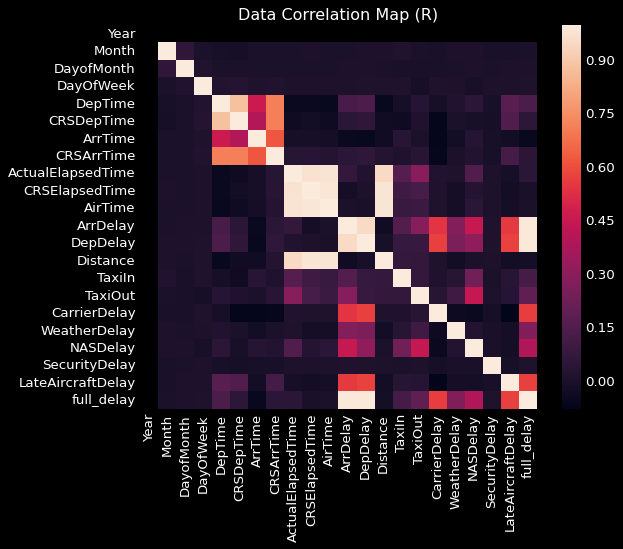

In [17]:
plt.title("Data Correlation Map (R)")
sns.heatmap(corr)

<AxesSubplot:title={'center':'Data Correlation Map (R²)'}>

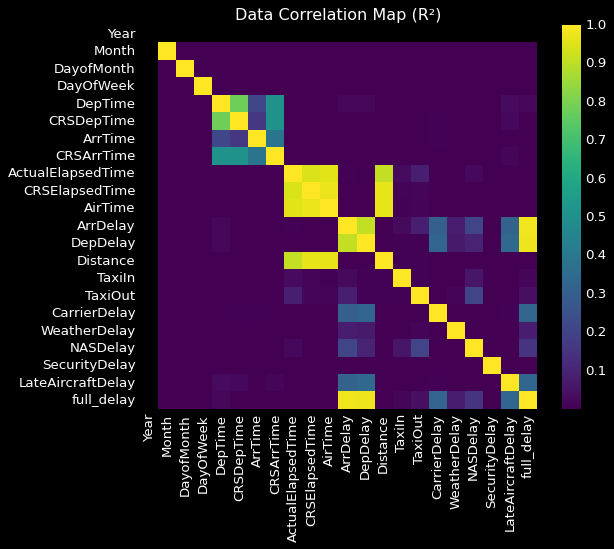

In [18]:
plt.title("Data Correlation Map (R²)")
sns.heatmap(corr**2, cmap='viridis')

<AxesSubplot:xlabel='DepDelay', ylabel='ArrDelay'>

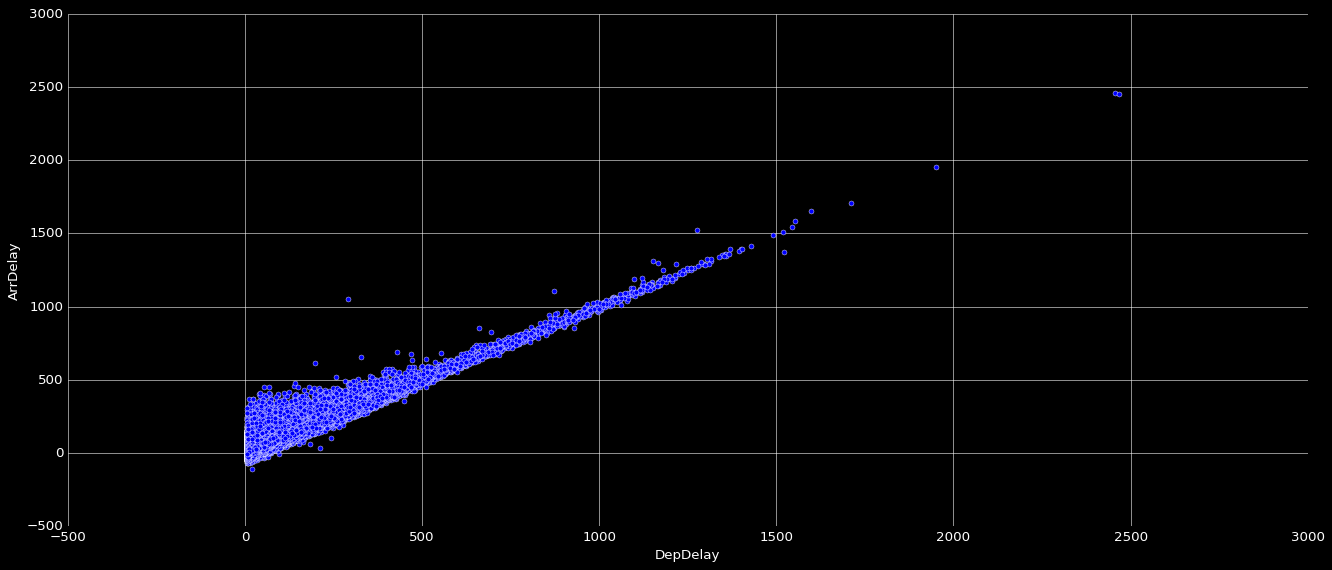

In [19]:
plot_init()
sns.scatterplot(x='DepDelay',y='ArrDelay',data=data)

In [20]:
data['DepTime'].sort_values(ascending=False).reset_index()

,index,DepTime
0,1196189,2400.0
1,265052,2400.0
2,1334240,2400.0
3,1123144,2400.0
4,555770,2400.0
...,...,...
1928359,68165,1.0
1928360,487731,1.0
1928361,642613,1.0
1928362,1930316,1.0


Text(0.5, 0, 'Time (hhmm)')

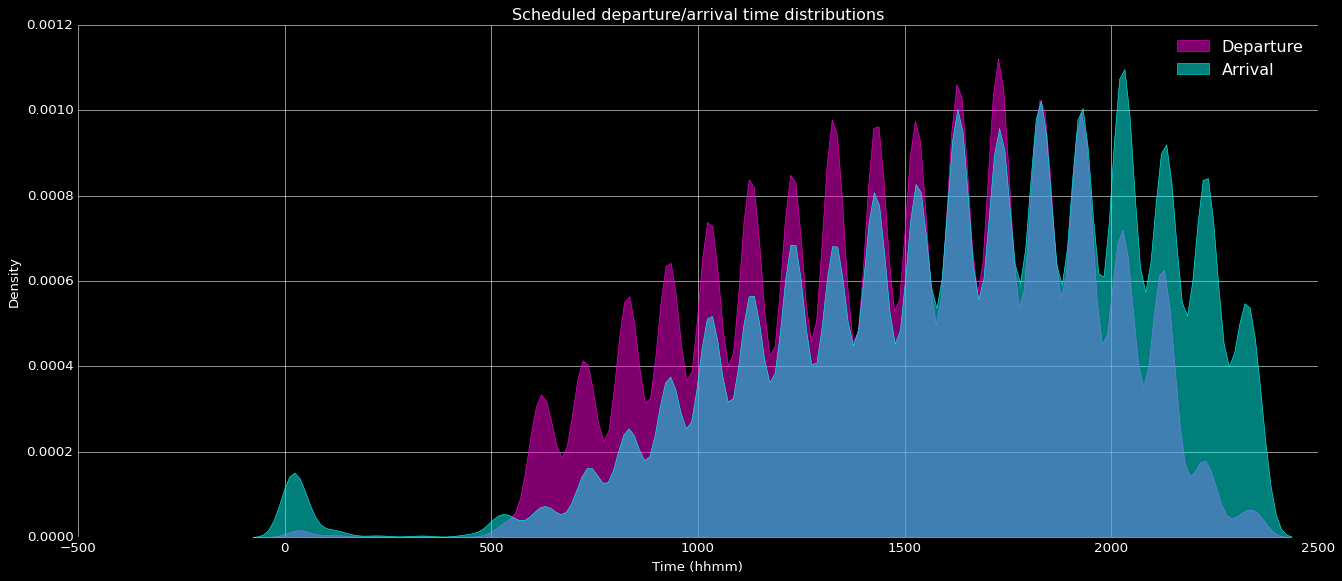

In [21]:
plot_init()
plt.title('Scheduled departure/arrival time distributions')
sns.kdeplot(data['CRSDepTime'], color='#ff00d9',label='Departure', fill=True,alpha=.5, linewidth=0.5)
sns.kdeplot(data['CRSArrTime'],color='#00fff7',label='Arrival', fill=True,alpha=.5, linewidth=0.5)
plt.legend()
plt.xlabel("Time (hhmm)")

Text(0.5, 0, 'Time (hhmm)')

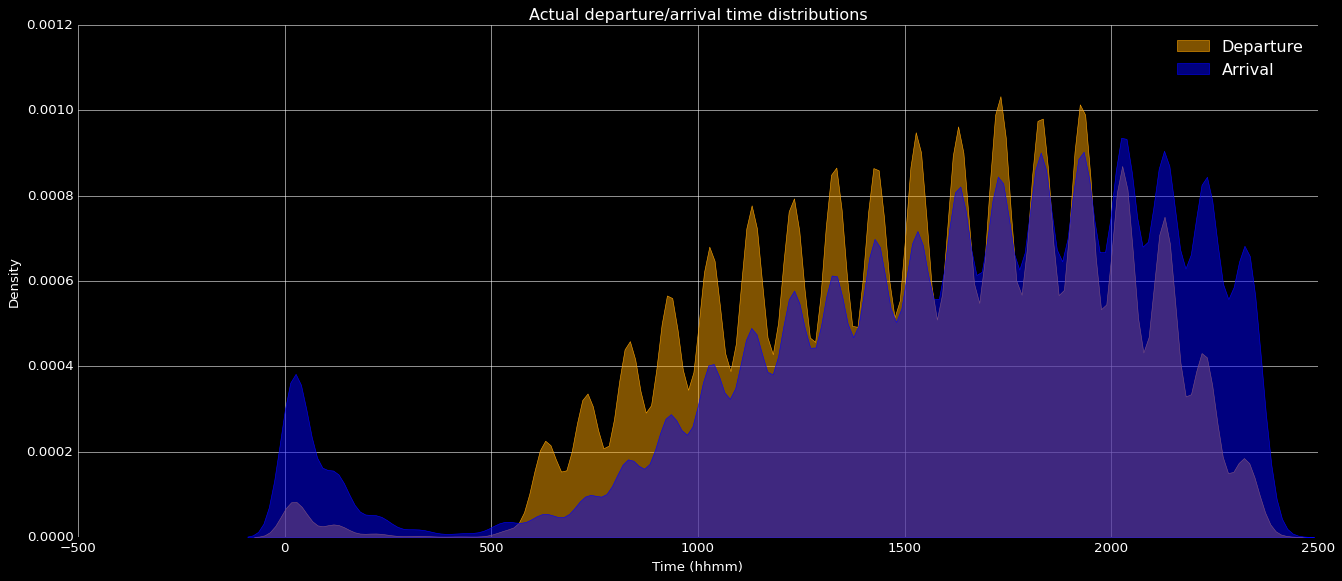

In [22]:
plot_init()
plt.title('Actual departure/arrival time distributions')
sns.kdeplot(data['DepTime'], label='Departure', color='orange',fill=True,alpha=.5, linewidth=0.5)
sns.kdeplot(data['ArrTime'],color='blue',label='Arrival',fill=True,alpha=.5, linewidth=0.5)
plt.legend()
plt.xlabel("Time (hhmm)")

/opt/conda/lib/python3.7/site-packages/pandas/core/arraylike.py:358: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


<AxesSubplot:title={'center':'Scheduled Elapsed Time (log scale)'}, xlabel='Time (min)', ylabel='Density'>

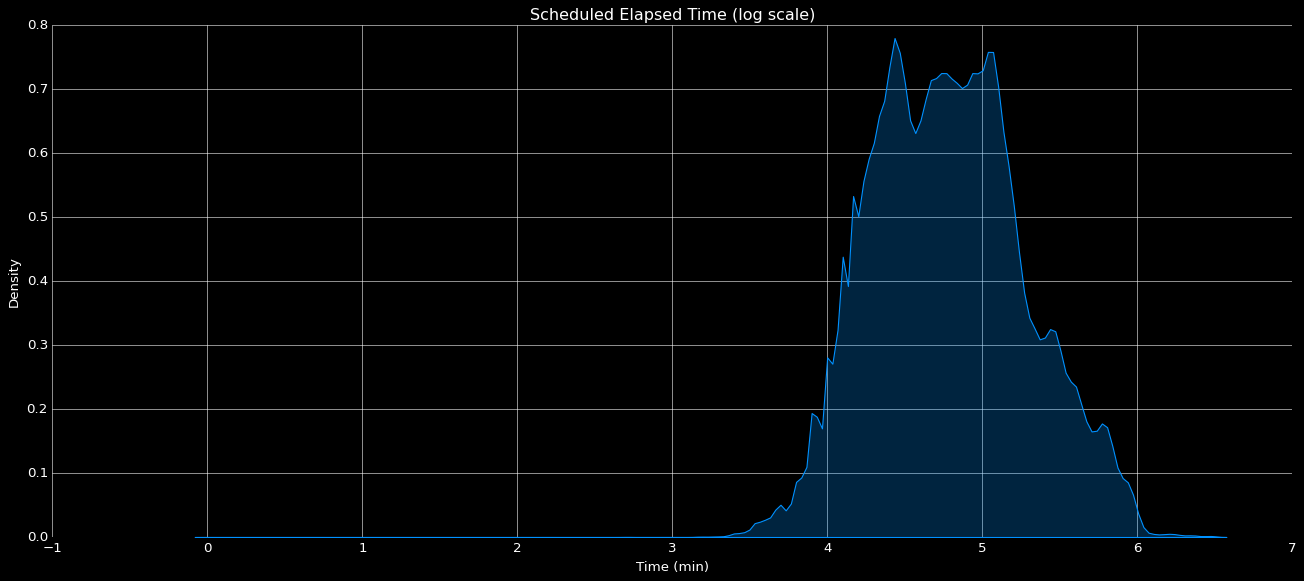

In [23]:
plot_init()
plt.title("Scheduled Elapsed Time (log scale)")
plt.xlabel("Time (min)")
sns.kdeplot(x=np.log(data['CRSElapsedTime']), data=data, fill=True, color='#0091ff', linewidth=1)

<AxesSubplot:title={'center':'Actual Elapsed Time (log scale)'}, xlabel='Time (min)', ylabel='Density'>

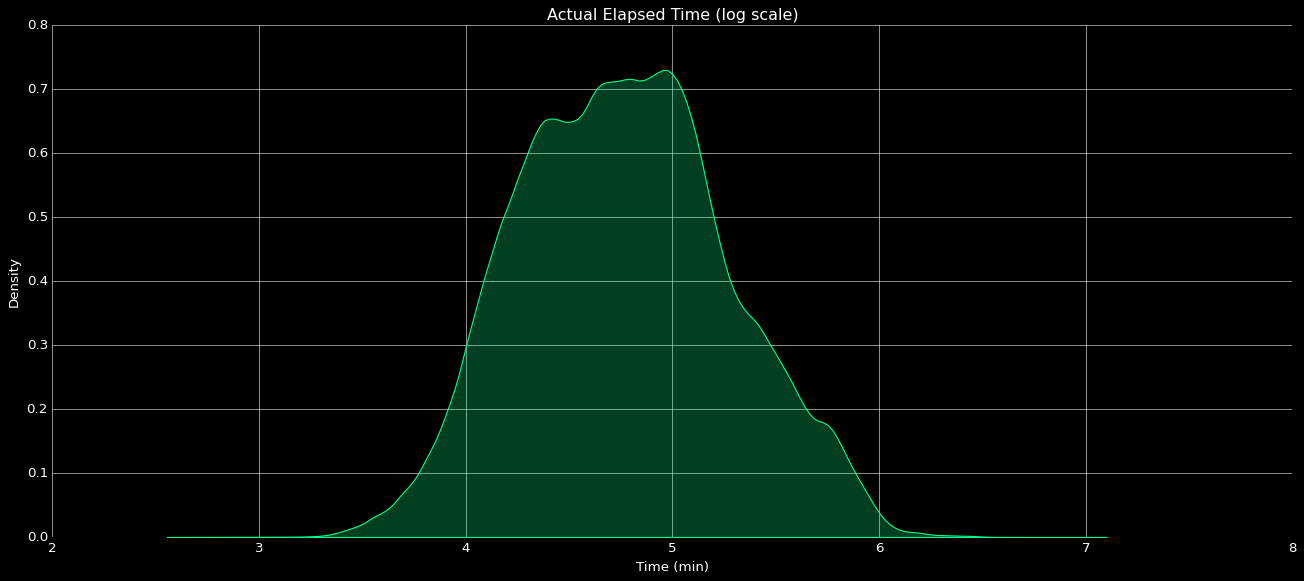

In [24]:
plot_init()
plt.title("Actual Elapsed Time (log scale)")
plt.xlabel("Time (min)")
sns.kdeplot(x=np.log(data['ActualElapsedTime']), data=data, color='#00ff88', fill=True,linewidth=1)

In [25]:
data[data.AirTime==0]

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,full_delay


In [26]:
data['Cancelled'].unique()

array([0])

<AxesSubplot:title={'center':'Air Time (log scale)'}, xlabel='Time (min)', ylabel='Density'>

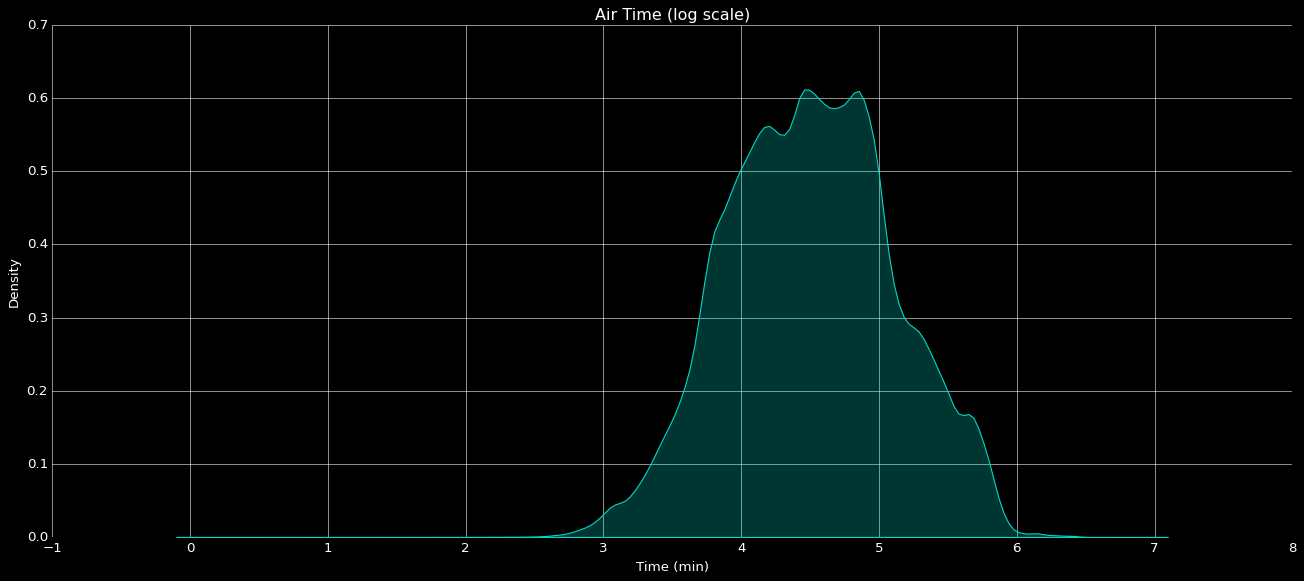

In [27]:
plot_init()
plt.title("Air Time (log scale)")
plt.xlabel("Time (min)")
sns.kdeplot(x=np.log(data['AirTime']), data=data, color='#00d9c7', fill=True,linewidth=1)

<AxesSubplot:title={'center':'Departure Delay (log scale)'}, xlabel='Time (min)', ylabel='Density'>

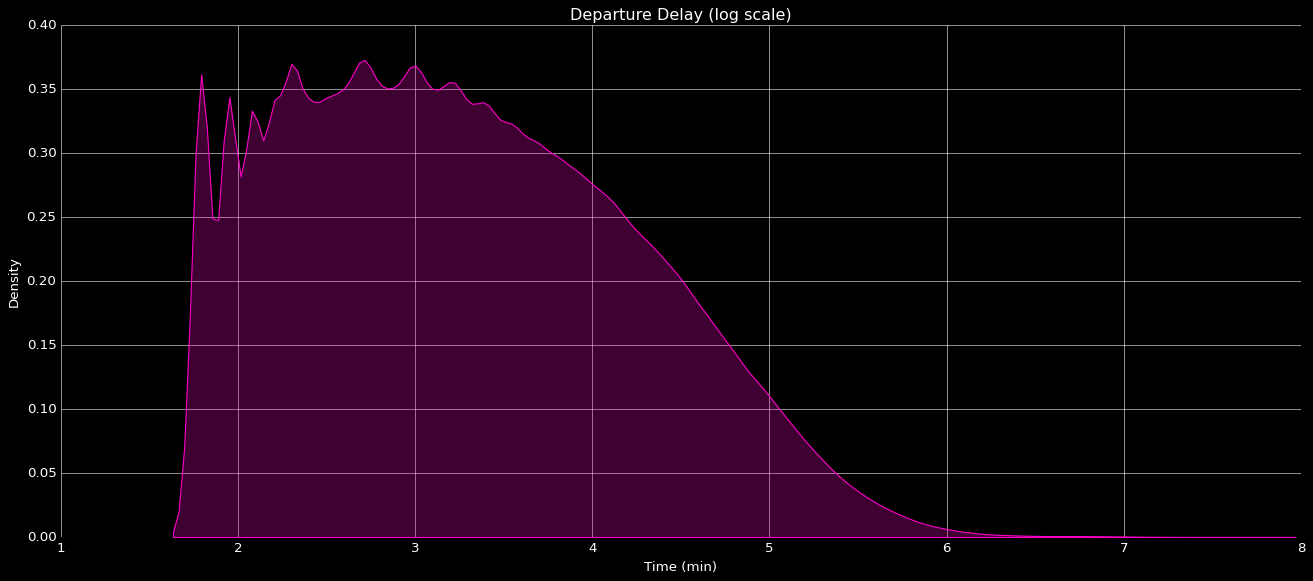

In [28]:
plot_init()
plt.title("Departure Delay (log scale)")
plt.xlabel("Time (min)")
sns.kdeplot(x=np.log(data['DepDelay']), data=data, color='#ff00c8', fill=True,linewidth=1)

<AxesSubplot:title={'center':'Arrival Delay (log scale)'}, xlabel='Time (min)', ylabel='Density'>

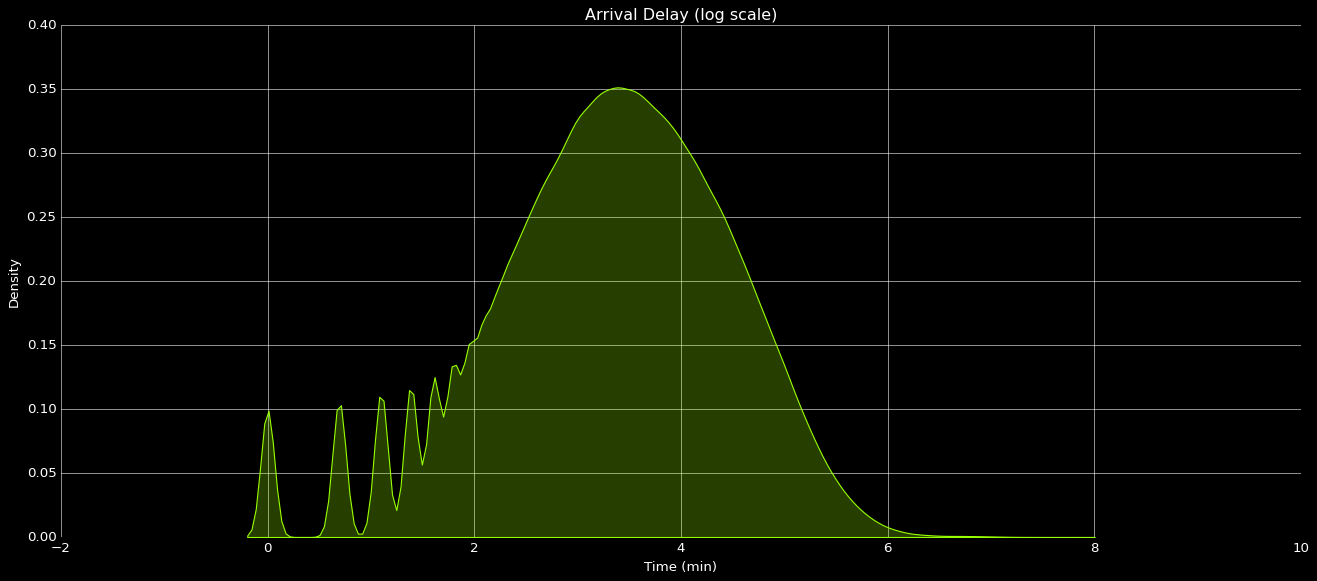

In [29]:
plot_init()
plt.title("Arrival Delay (log scale)")
plt.xlabel("Time (min)")
sns.kdeplot(x=np.log(data[(data['ArrDelay'].notna()) & (data['ArrDelay']>0)]['ArrDelay']), data=data, color='#99ff00', fill=True,linewidth=1)

In [30]:
extension_delays = data[['CarrierDelay','WeatherDelay','NASDelay','SecurityDelay','LateAircraftDelay']]

In [31]:
extension_delays_median = extension_delays.median().reset_index()

In [32]:
extension_delays_mean = extension_delays.mean().reset_index()

Text(0.5, 1.0, 'Mean Delay Time by Delay Types')

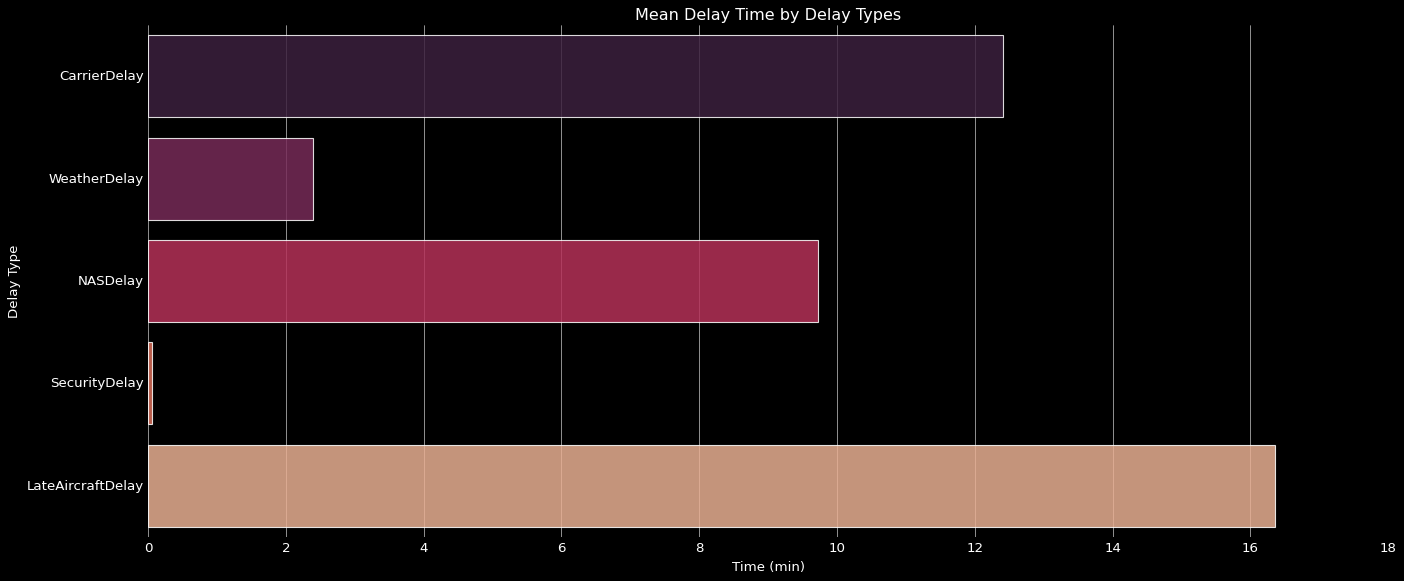

In [33]:
plot_init()
sns.barplot(x=0,y='index',data=extension_delays_mean, palette='rocket', alpha=.85)

plt.xlabel('Time (min)')
plt.ylabel("Delay Type")
plt.title("Mean Delay Time by Delay Types")

<AxesSubplot:title={'center':'Flight Distance (log scale)'}, xlabel='Distance (miles)', ylabel='Density'>

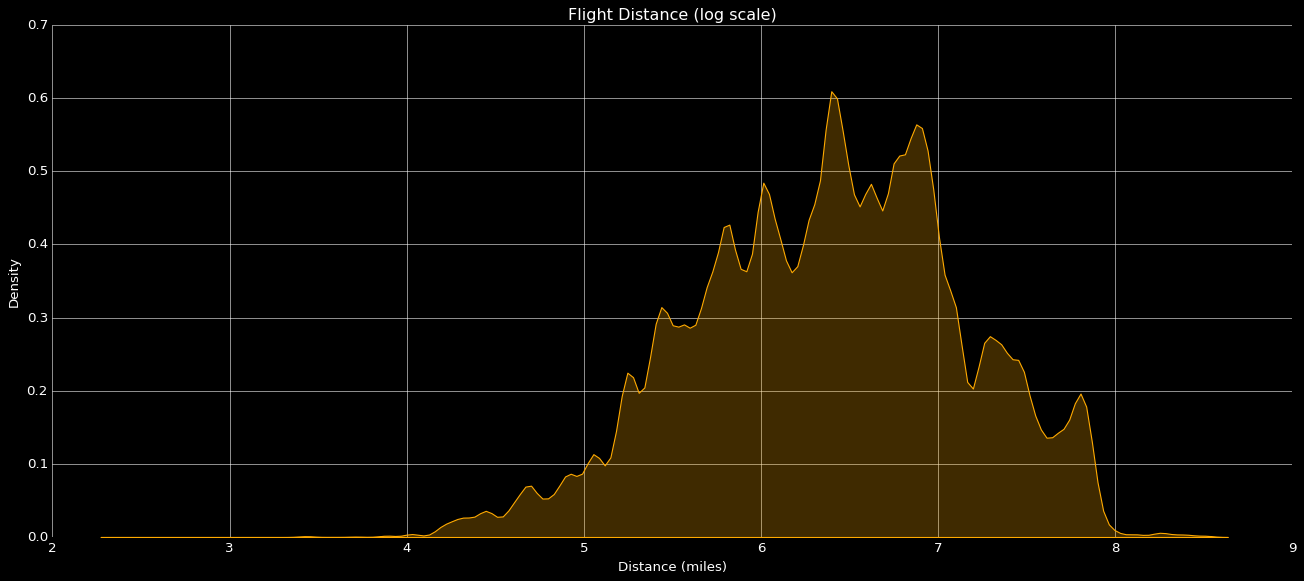

In [34]:
plot_init()
plt.title("Flight Distance (log scale)")
plt.xlabel("Distance (miles)")
sns.kdeplot(x=np.log(data['Distance']), data=data, color='#ffaa00', fill=True,linewidth=1)

<AxesSubplot:title={'center':'Carrier Distribution'}, xlabel='UniqueCarrier', ylabel='count'>

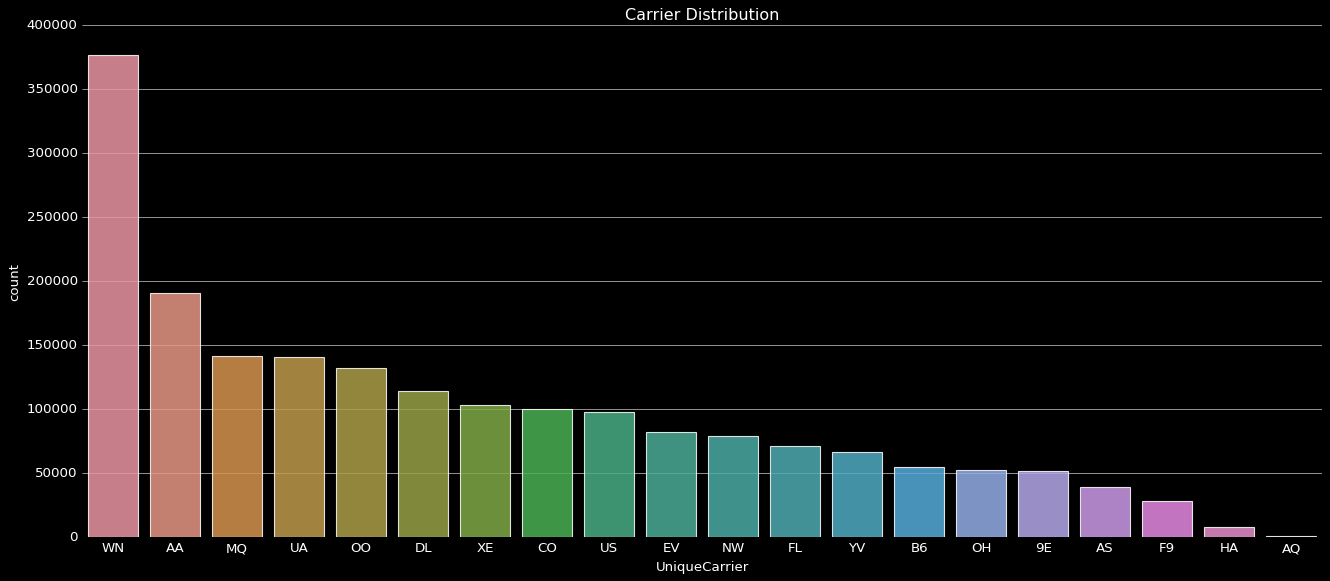

In [35]:
plot_init()
plt.title('Carrier Distribution')
sns.countplot(x='UniqueCarrier', data=data, alpha=.85, order=data['UniqueCarrier'].value_counts().index)

In [36]:
data['Origin'].nunique()

303

In [37]:
data['Dest'].nunique()

302

In [38]:
most_common_origin_dest_Comb = data.groupby(['Origin','Dest']).size().nlargest(10).reset_index().rename(columns={0:'count'})

In [39]:
most_common_origin_dest_Comb

,Origin,Dest,count
0,LAX,SFO,4734
1,ORD,LGA,4355
2,ATL,LGA,4025
3,SFO,LAX,4015
4,LAS,LAX,3512
5,LGA,ATL,3343
6,ORD,EWR,3338
7,LGA,ORD,3301
8,ATL,EWR,3271
9,DFW,ORD,3260


In [40]:
def StrMrg(a,b):
    a = str(a)
    b = str(b)
    return f'{a}-{b}'

most_common_origin_dest_Comb['strcomb'] = most_common_origin_dest_Comb.apply(lambda x: StrMrg(x.Origin,x.Dest), axis=1)

In [41]:
most_common_origin_dest_Comb

,Origin,Dest,count,strcomb
0,LAX,SFO,4734,LAX-SFO
1,ORD,LGA,4355,ORD-LGA
2,ATL,LGA,4025,ATL-LGA
3,SFO,LAX,4015,SFO-LAX
4,LAS,LAX,3512,LAS-LAX
5,LGA,ATL,3343,LGA-ATL
6,ORD,EWR,3338,ORD-EWR
7,LGA,ORD,3301,LGA-ORD
8,ATL,EWR,3271,ATL-EWR
9,DFW,ORD,3260,DFW-ORD


In [42]:
rest_od_comb = len(data)-most_common_origin_dest_Comb['count'].sum()
most_common_origin_dest_Comb.loc[-1] = [np.nan, np.nan, rest_od_comb,'Others']

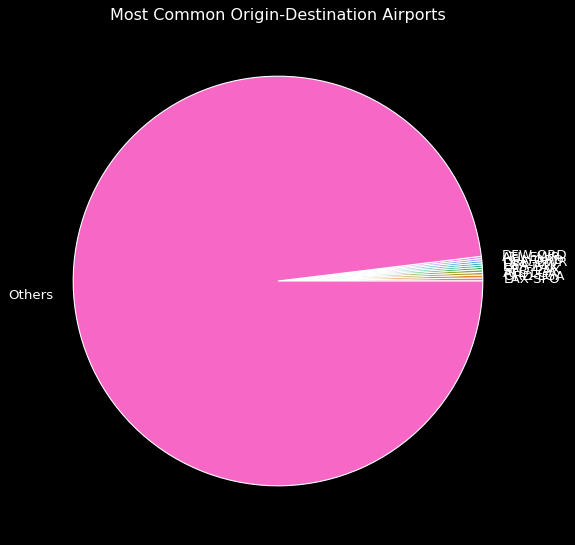

In [43]:
plot_init()
plt.title("Most Common Origin-Destination Airports")
pal = sns.color_palette("husl", 11)
pie = plt.pie(most_common_origin_dest_Comb['count'], labels=most_common_origin_dest_Comb['strcomb'], colors=pal)


Text(0.5, 0.98, 'Most Common Origin-Destination Airports (log transformed)')

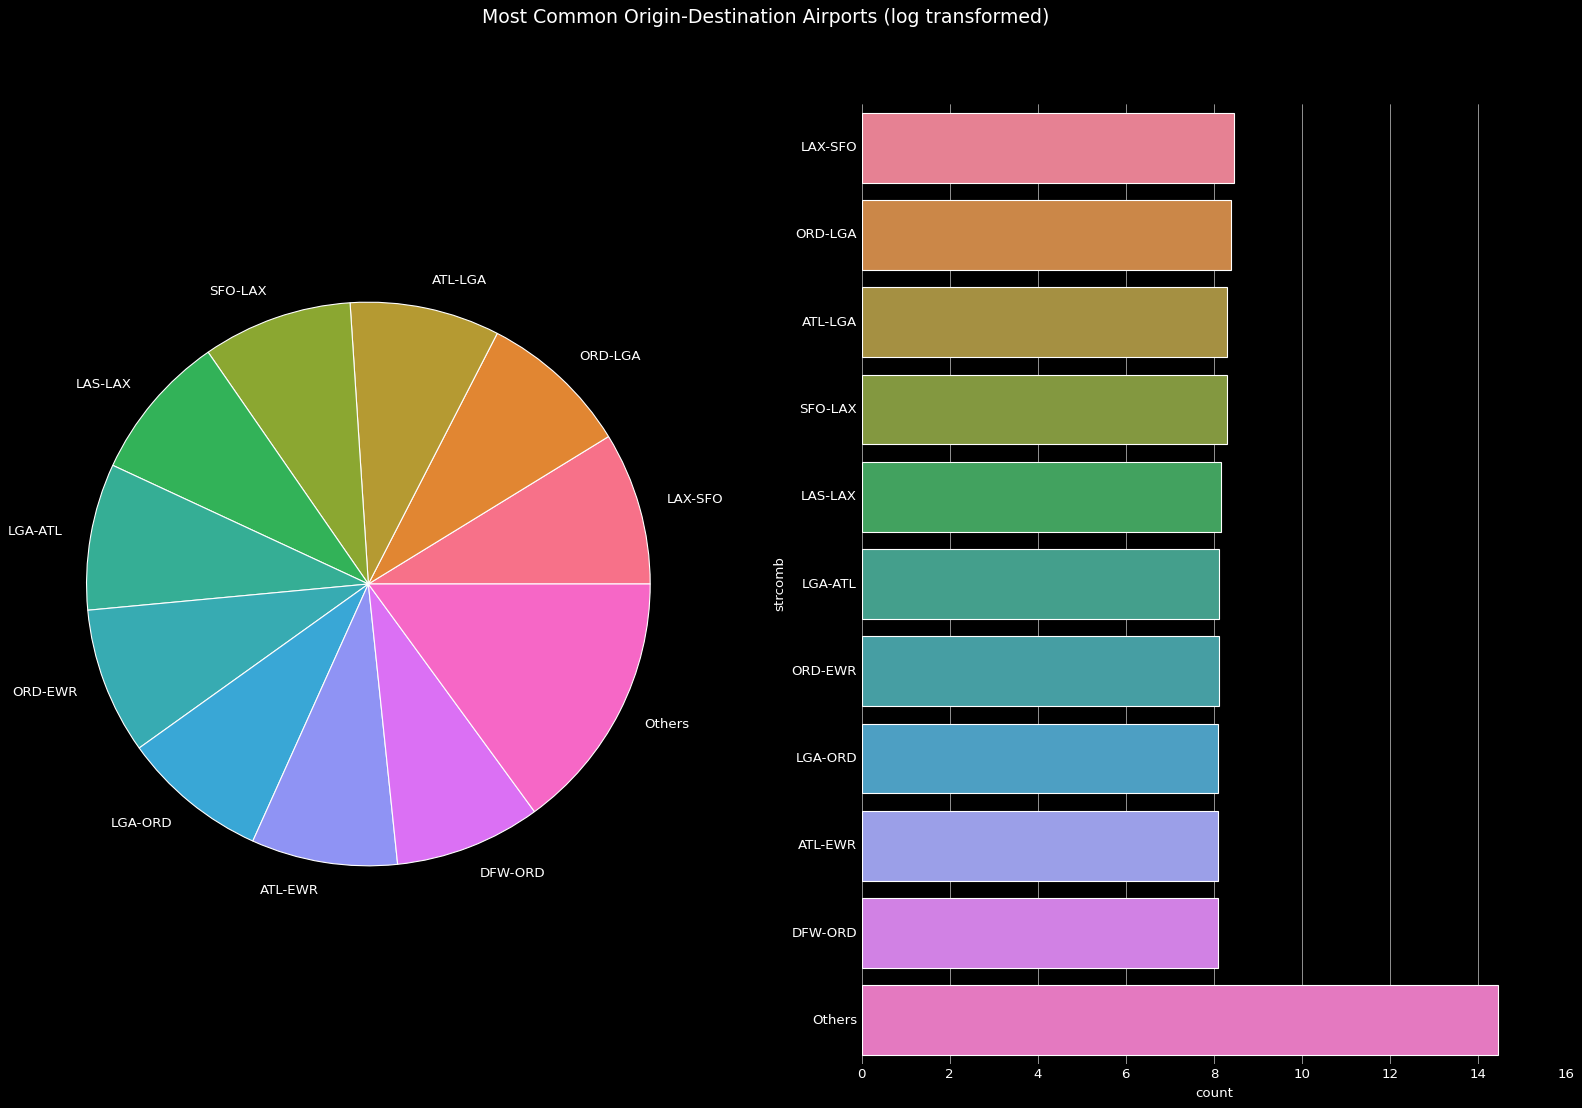

In [44]:
fig, axs = plt.subplots(1, 2, figsize=(25,15))
axs[0].pie(np.log(most_common_origin_dest_Comb['count']), labels=most_common_origin_dest_Comb['strcomb'], colors=pal)
axs[1] = sns.barplot(y='strcomb',x=np.log(most_common_origin_dest_Comb['count']), data=most_common_origin_dest_Comb, palette=pal)
fig.suptitle("Most Common Origin-Destination Airports (log transformed)", size=17)


In [45]:
median_airtime_by_carrier = data.groupby("UniqueCarrier")['AirTime'].median().reset_index()

Text(0, 0.5, 'Carrier')

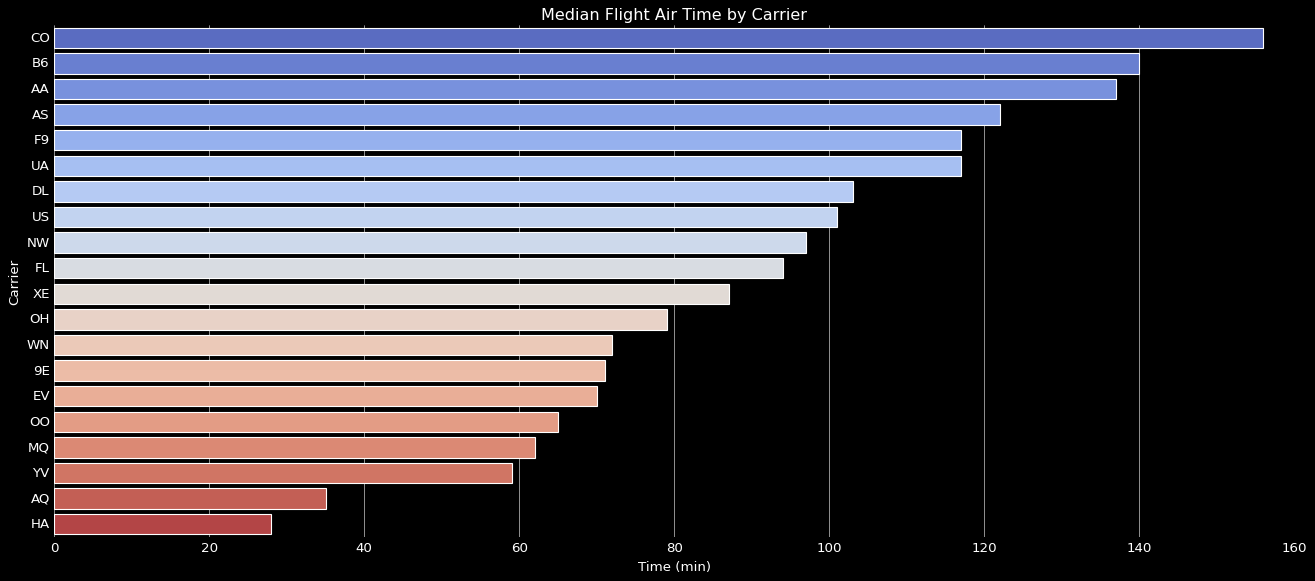

In [46]:
plot_init()
plt.title('Median Flight Air Time by Carrier')
sns.barplot(x='AirTime',y='UniqueCarrier', palette='coolwarm', data=median_airtime_by_carrier , order=median_airtime_by_carrier.sort_values('AirTime',ascending=False)['UniqueCarrier'])
plt.xlabel('Time (min)')
plt.ylabel('Carrier')

Text(0.5, 0, 'Time (min)')

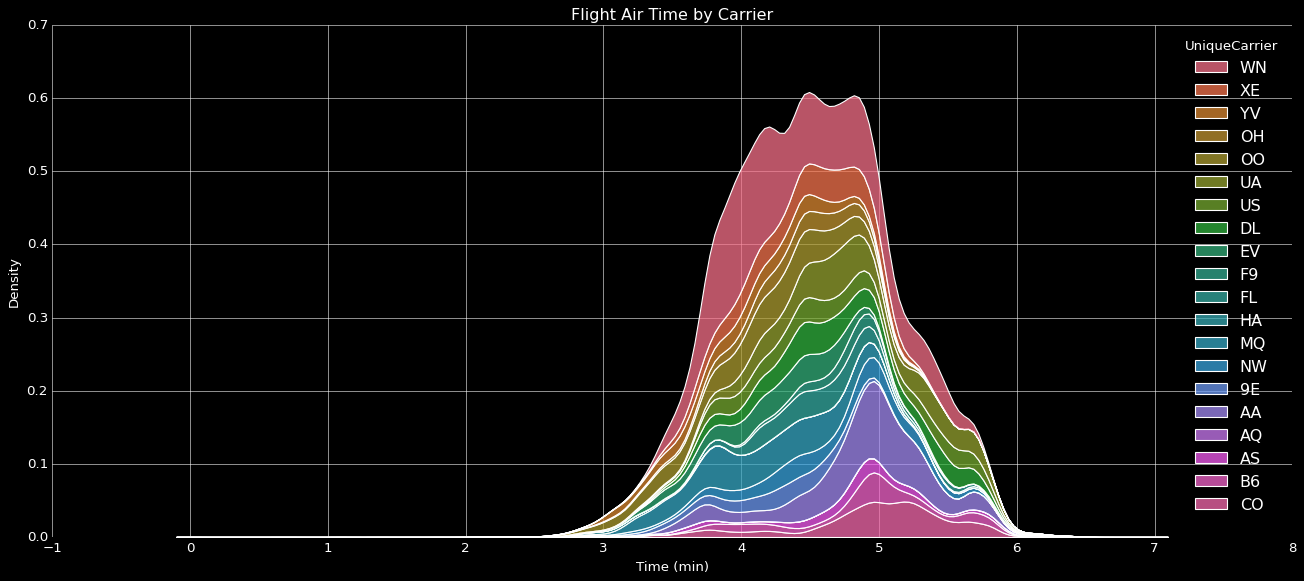

In [47]:
plot_init()
plt.title('Flight Air Time by Carrier')
pal2 = sns.color_palette("husl", data['UniqueCarrier'].nunique())
sns.kdeplot(x=np.log(data['AirTime']),hue='UniqueCarrier', palette=pal2, multiple='stack', data=data)
plt.xlabel('Time (min)')

In [48]:
median_depdelay_by_carrier = data.groupby("UniqueCarrier")['DepDelay'].median().reset_index()

Text(0, 0.5, 'Carrier')

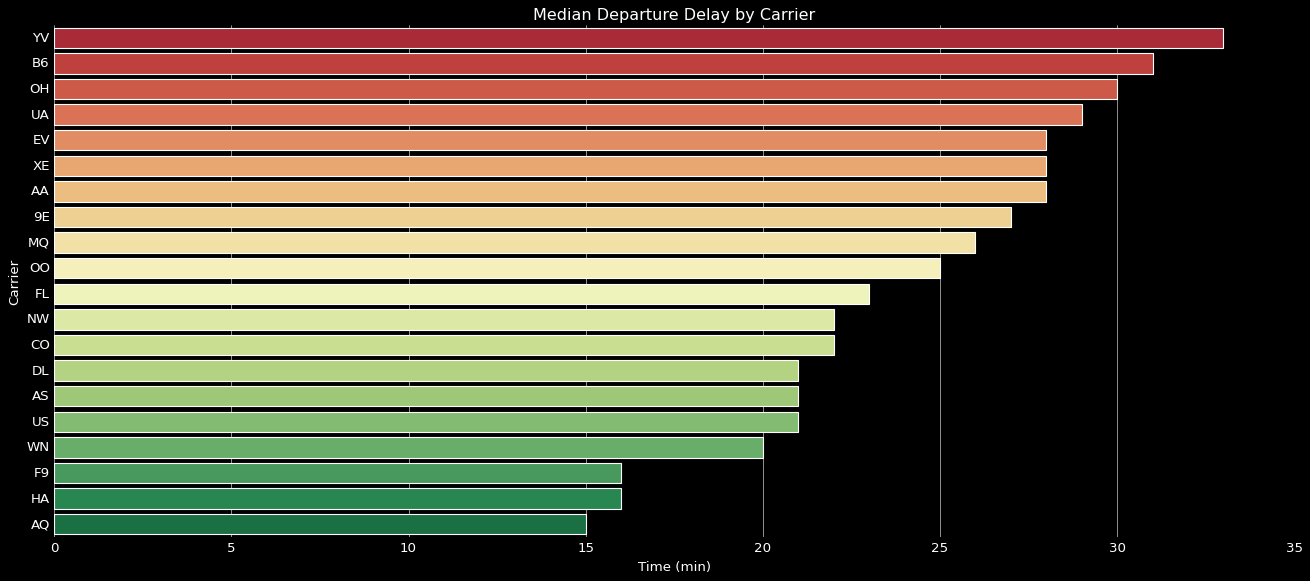

In [49]:
plot_init()
plt.title('Median Departure Delay by Carrier')
sns.barplot(x='DepDelay',y='UniqueCarrier', palette='RdYlGn', data=median_depdelay_by_carrier , order=median_depdelay_by_carrier.sort_values('DepDelay',ascending=False)['UniqueCarrier'])
plt.xlabel('Time (min)')
plt.ylabel('Carrier')

Text(0.5, 0, 'Time (min)')

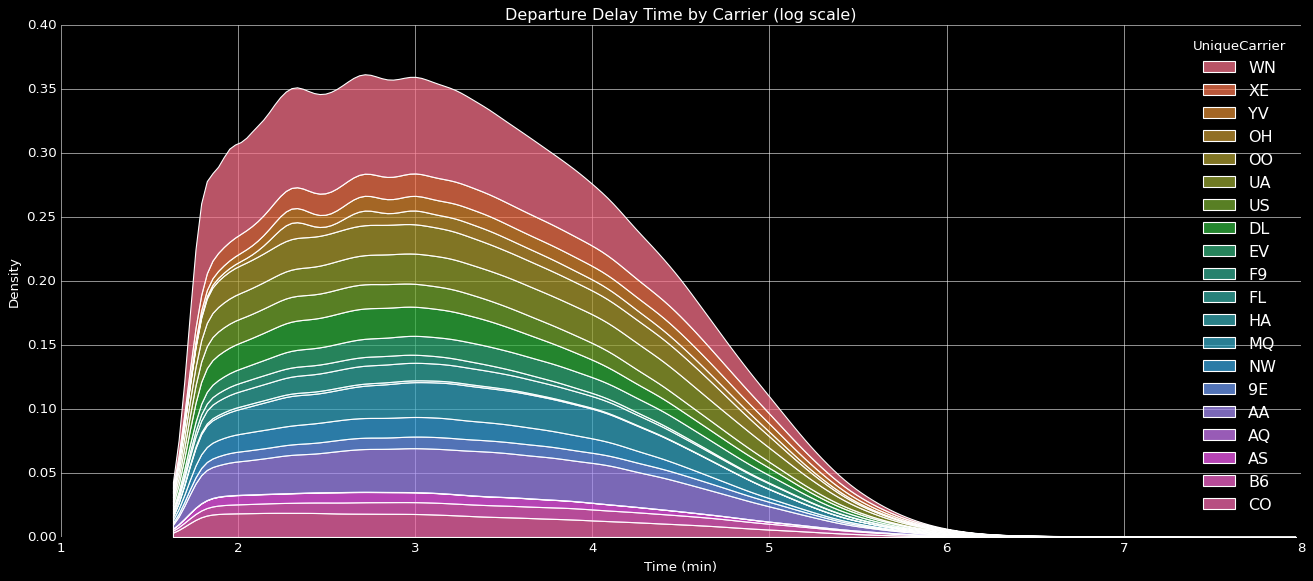

In [50]:
plot_init()
plt.title('Departure Delay Time by Carrier (log scale)')
pal2 = sns.color_palette("husl", data['UniqueCarrier'].nunique())
sns.kdeplot(x=np.log(data['DepDelay']),hue='UniqueCarrier', palette=pal2, multiple='stack', data=data)
plt.xlabel('Time (min)')

In [51]:
median_arrdelay_by_carrier = data.groupby("UniqueCarrier")['ArrDelay'].median().reset_index()

Text(0, 0.5, 'Carrier')

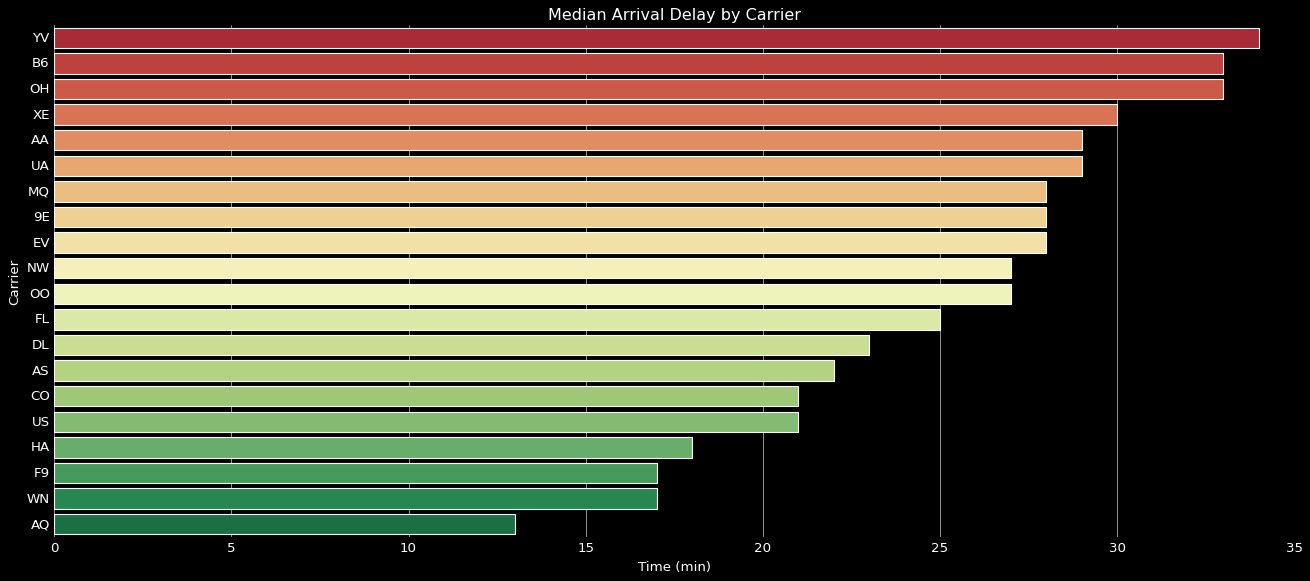

In [52]:
plot_init()
plt.title('Median Arrival Delay by Carrier')
sns.barplot(x='ArrDelay',y='UniqueCarrier', palette='RdYlGn', data=median_arrdelay_by_carrier , order=median_arrdelay_by_carrier.sort_values('ArrDelay',ascending=False)['UniqueCarrier'])
plt.xlabel('Time (min)')
plt.ylabel('Carrier')

Text(0.5, 0, 'Time (min)')

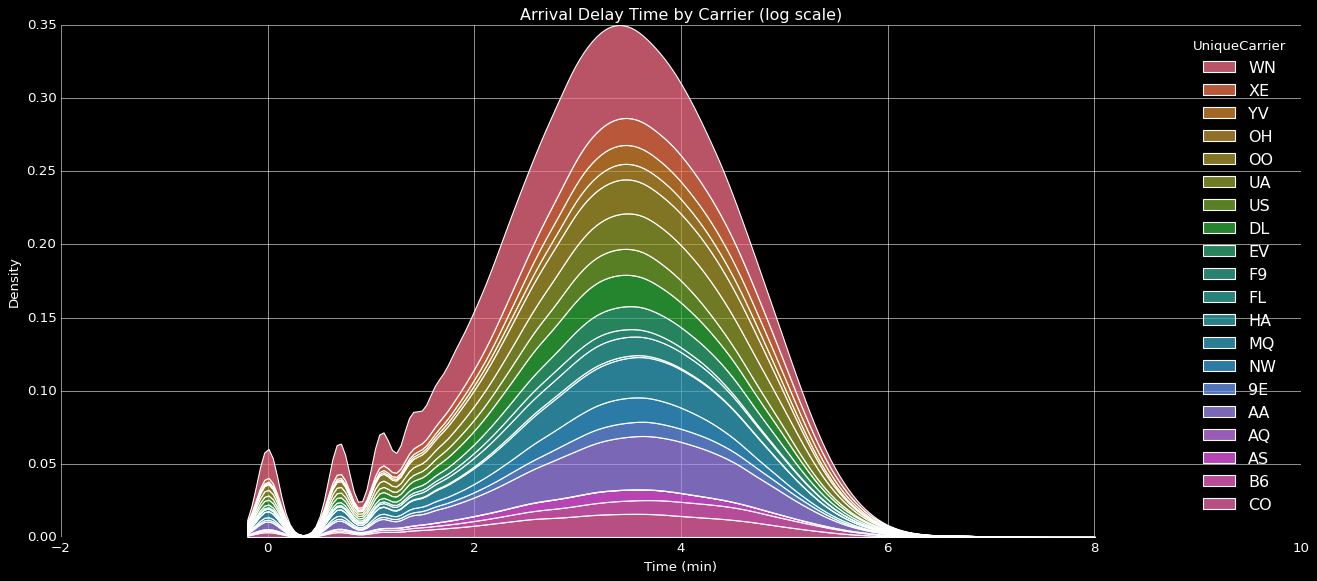

In [53]:
plot_init()
plt.title('Arrival Delay Time by Carrier (log scale)')
pal2 = sns.color_palette("husl", data['UniqueCarrier'].nunique())
sns.kdeplot(x=np.log(data[(data['ArrDelay'].notna()) & (data['ArrDelay']>0)]['ArrDelay']),hue='UniqueCarrier', palette=pal2, multiple='stack', data=data)
plt.xlabel('Time (min)')

In [54]:
data

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,full_delay
0,2008,1,3,4,2003.0,1955,2211.0,2225,WN,335,N712SW,128.0,150.0,116.0,-14.0,8.0,IAD,TPA,810,4.0,8.0,0,N,0,0.0,0.0,0.0,0.0,0.0,-6.0
1,2008,1,3,4,754.0,735,1002.0,1000,WN,3231,N772SW,128.0,145.0,113.0,2.0,19.0,IAD,TPA,810,5.0,10.0,0,N,0,0.0,0.0,0.0,0.0,0.0,21.0
2,2008,1,3,4,628.0,620,804.0,750,WN,448,N428WN,96.0,90.0,76.0,14.0,8.0,IND,BWI,515,3.0,17.0,0,N,0,0.0,0.0,0.0,0.0,0.0,22.0
3,2008,1,3,4,1829.0,1755,1959.0,1925,WN,3920,N464WN,90.0,90.0,77.0,34.0,34.0,IND,BWI,515,3.0,10.0,0,N,0,2.0,0.0,0.0,0.0,32.0,68.0
4,2008,1,3,4,1940.0,1915,2121.0,2110,WN,378,N726SW,101.0,115.0,87.0,11.0,25.0,IND,JAX,688,4.0,10.0,0,N,0,0.0,0.0,0.0,0.0,0.0,36.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1936753,2008,12,13,6,1250.0,1220,1617.0,1552,DL,1621,N938DL,147.0,152.0,120.0,25.0,30.0,MSP,ATL,906,9.0,18.0,0,N,0,3.0,0.0,0.0,0.0,22.0,55.0
1936754,2008,12,13,6,657.0,600,904.0,749,DL,1631,N3743H,127.0,109.0,78.0,75.0,57.0,RIC,ATL,481,15.0,34.0,0,N,0,0.0,57.0,18.0,0.0,0.0,132.0
1936755,2008,12,13,6,1007.0,847,1149.0,1010,DL,1631,N909DA,162.0,143.0,122.0,99.0,80.0,ATL,IAH,689,8.0,32.0,0,N,0,1.0,0.0,19.0,0.0,79.0,179.0
1936756,2008,12,13,6,1251.0,1240,1446.0,1437,DL,1639,N646DL,115.0,117.0,89.0,9.0,11.0,IAD,ATL,533,13.0,13.0,0,N,0,0.0,0.0,0.0,0.0,0.0,20.0


In [55]:
most_common_origin_dest_Comb = most_common_origin_dest_Comb[:10]

<br>

In [56]:
def AirportCombinationValGather(origin,dest,col_to_gather):
    constrained_dataset = data[(data.Origin==origin) & (data.Dest==dest)]
    median = constrained_dataset[col_to_gather].median()
    return median

In [57]:
most_common_origin_dest_Comb['MedianDepDelay'] = most_common_origin_dest_Comb.apply(lambda x: AirportCombinationValGather(x.Origin,x.Dest,'DepDelay'), axis=1)
most_common_origin_dest_Comb['MedianArrDelay'] = most_common_origin_dest_Comb.apply(lambda x: AirportCombinationValGather(x.Origin,x.Dest,'ArrDelay'), axis=1)
most_common_origin_dest_Comb['MedianAirTime'] = most_common_origin_dest_Comb.apply(lambda x: AirportCombinationValGather(x.Origin,x.Dest,'AirTime'), axis=1)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [58]:
most_common_origin_dest_Comb

,Origin,Dest,count,strcomb,MedianDepDelay,MedianArrDelay,MedianAirTime
0,LAX,SFO,4734,LAX-SFO,33.0,32.0,56.0
1,ORD,LGA,4355,ORD-LGA,37.0,40.0,100.0
2,ATL,LGA,4025,ATL-LGA,27.0,30.0,105.0
3,SFO,LAX,4015,SFO-LAX,32.0,30.0,55.0
4,LAS,LAX,3512,LAS-LAX,22.0,21.0,42.0
5,LGA,ATL,3343,LGA-ATL,28.0,29.0,113.0
6,ORD,EWR,3338,ORD-EWR,50.0,48.5,97.0
7,LGA,ORD,3301,LGA-ORD,41.0,47.0,118.0
8,ATL,EWR,3271,ATL-EWR,40.0,40.0,104.0
9,DFW,ORD,3260,DFW-ORD,33.0,35.0,109.0


Text(0.5, 0, 'Flight')

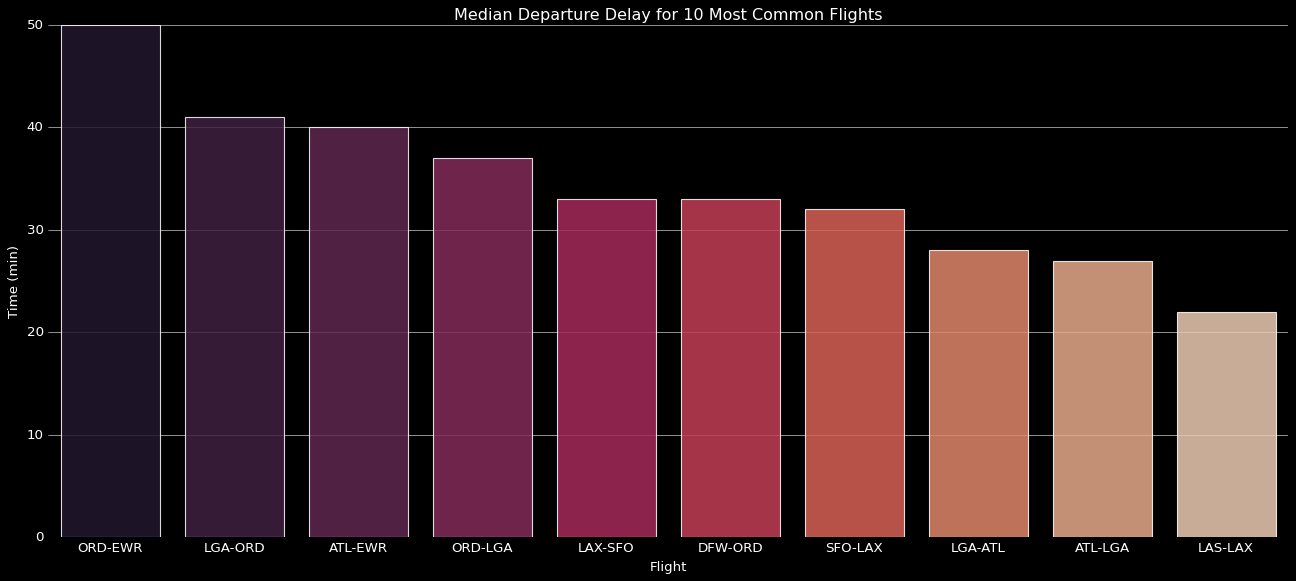

In [59]:
plot_init()
plt.title('Median Departure Delay for 10 Most Common Flights')
sns.barplot(y='MedianDepDelay',x='strcomb', data=most_common_origin_dest_Comb, alpha=.85, palette='rocket',
            order=most_common_origin_dest_Comb.sort_values('MedianDepDelay',ascending=False)['strcomb'])
plt.ylabel("Time (min)")
plt.xlabel("Flight")

Text(0.5, 0, 'Flight')

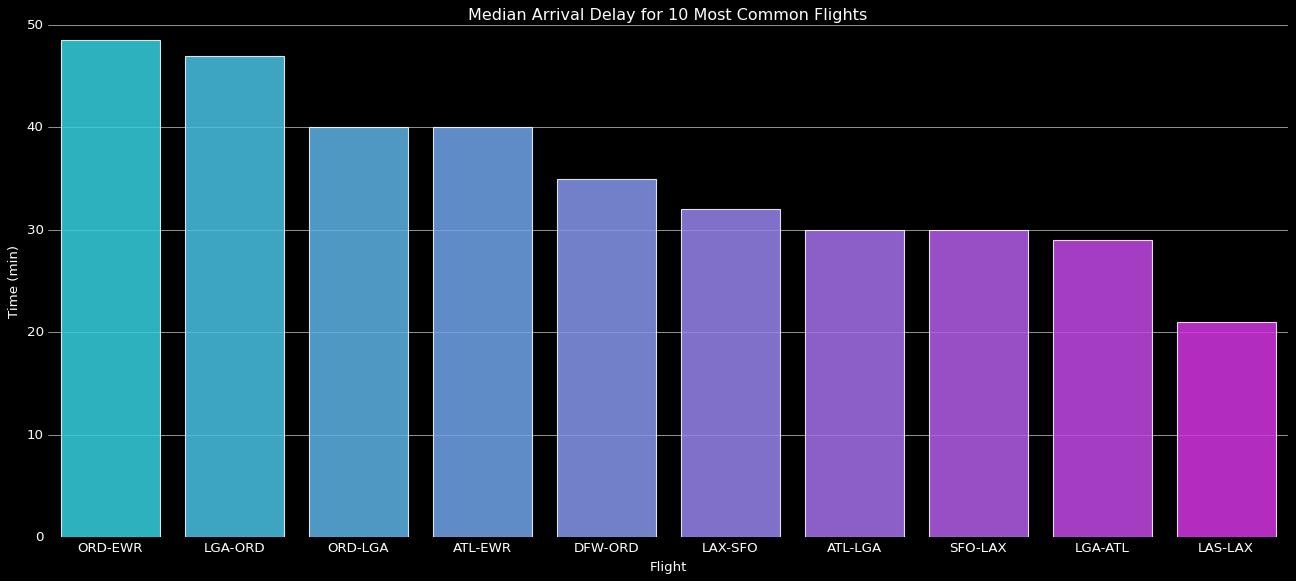

In [60]:
plot_init()
plt.title('Median Arrival Delay for 10 Most Common Flights')
sns.barplot(y='MedianArrDelay',x='strcomb', data=most_common_origin_dest_Comb, alpha=.85, palette='cool',
            order=most_common_origin_dest_Comb.sort_values('MedianArrDelay',ascending=False)['strcomb'])
plt.ylabel("Time (min)")
plt.xlabel("Flight")

Text(0.5, 0, 'Flight')

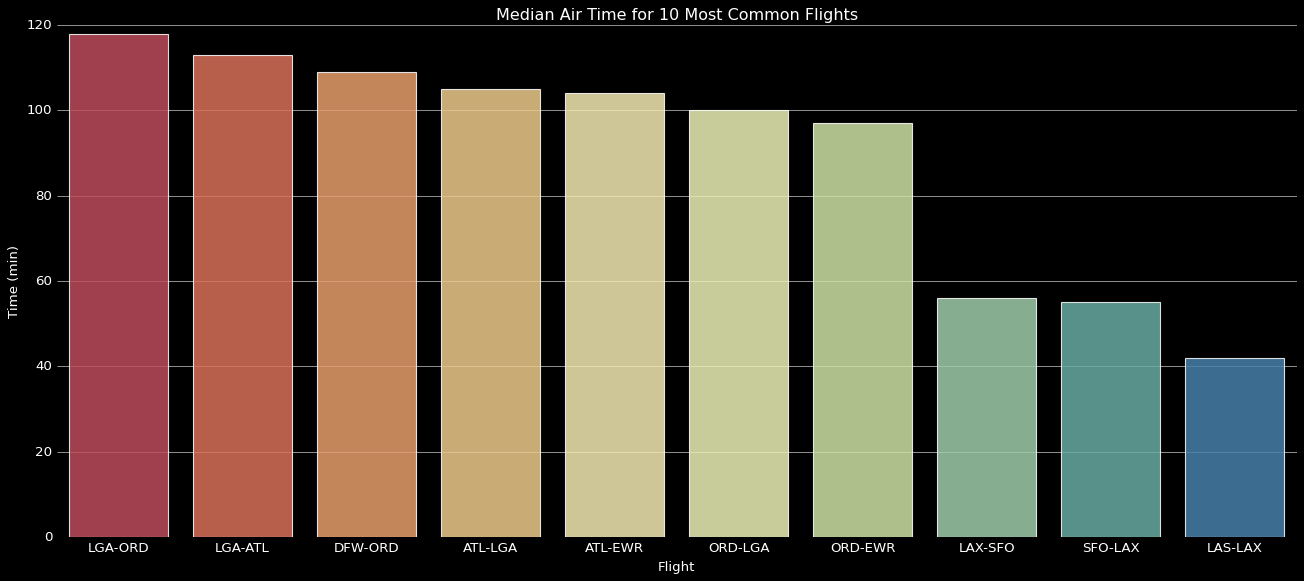

In [61]:
plot_init()
plt.title('Median Air Time for 10 Most Common Flights')
sns.barplot(y='MedianAirTime',x='strcomb', data=most_common_origin_dest_Comb, alpha=.85, palette='Spectral',
            order=most_common_origin_dest_Comb.sort_values('MedianAirTime',ascending=False)['strcomb'])
plt.ylabel("Time (min)")
plt.xlabel("Flight")

In [62]:
data.groupby(['UniqueCarrier','Origin','Dest']).median()[['DepDelay','ArrDelay','AirTime']]

DepDelay  ArrDelay  AirTime
UniqueCarrier Origin Dest                             
9E            ABE    DTW       25.0      29.0     81.0
              ALB    DTW       32.0      22.0     83.0
                     MSP       34.5      30.0    147.5
              ALO    MSP       31.0      26.0     34.0
              ATL    AUS       23.0      15.0    111.0
...                             ...       ...      ...
YV            TVC    ORD       50.5      51.0     47.0
              TYS    IAD       26.5      23.0     70.0
                     ORD       45.0      59.5     80.0
              YUM    LAS       47.0      38.0     55.0
                     PHX       25.0      21.0     39.0

[8321 rows x 3 columns]

In [63]:
pivfl = data.pivot_table(index='Month', 
                        columns='DayOfWeek', 
                        values='full_delay', aggfunc=np.median)

In [64]:
pivfl

DayOfWeek,1,2,3,4,5,6,7
Month,,,,,,,
1,54.0,54.5,49.0,52.0,47.0,45.0,47.0
2,58.0,67.0,53.0,46.0,56.0,42.0,53.0
3,49.0,53.0,50.0,43.0,53.0,49.0,47.0
4,42.0,44.0,38.0,45.0,58.0,42.0,42.0
5,41.0,47.0,42.0,41.0,53.0,38.0,39.0
6,52.0,51.0,53.0,58.0,56.0,48.0,61.0
7,50.0,51.0,51.0,55.0,43.0,44.0,72.0
8,53.0,46.0,43.0,52.0,50.0,43.0,41.0
9,40.0,41.0,35.0,40.0,43.0,40.0,41.0


<AxesSubplot:title={'center':'Median Full Delay Heatmap by Time Position'}, xlabel='DayOfWeek', ylabel='Month'>

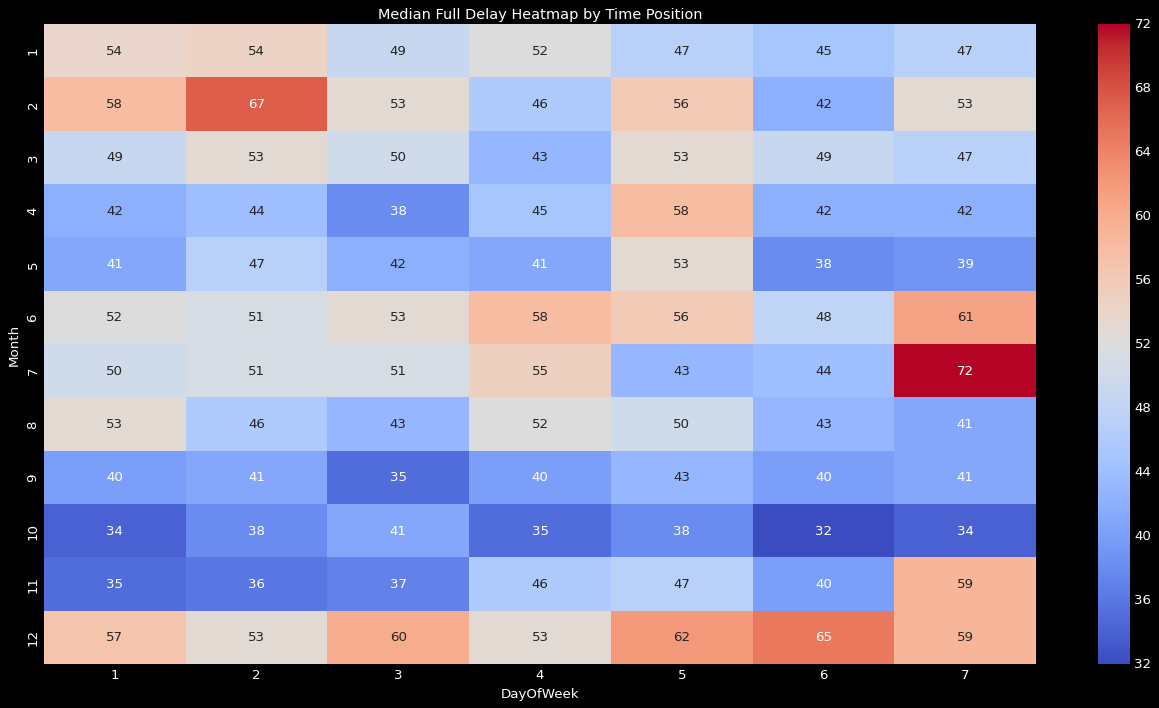

In [65]:
plt.figure(figsize=(20,10))
plt.title("Median Full Delay Heatmap by Time Position", size=13)
sns.heatmap(pivfl, annot=True, cmap='coolwarm')

You definitely don't want to fly on Sundays in July.

Text(0, 0.5, 'Delay (minutes)')

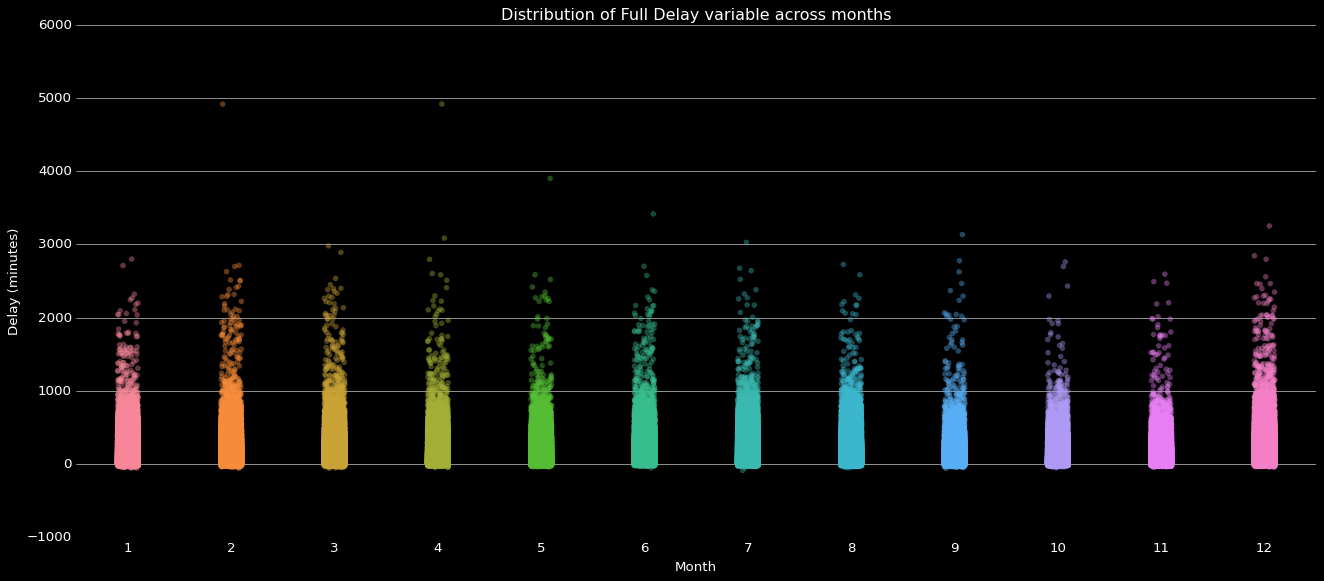

In [66]:
plot_init()
plt.title("Distribution of Full Delay variable across months")
sns.stripplot(x='Month',y='full_delay', alpha=.40, data=data)
plt.ylabel("Delay (minutes)")

Text(0, 0.5, 'Delay (minutes)')

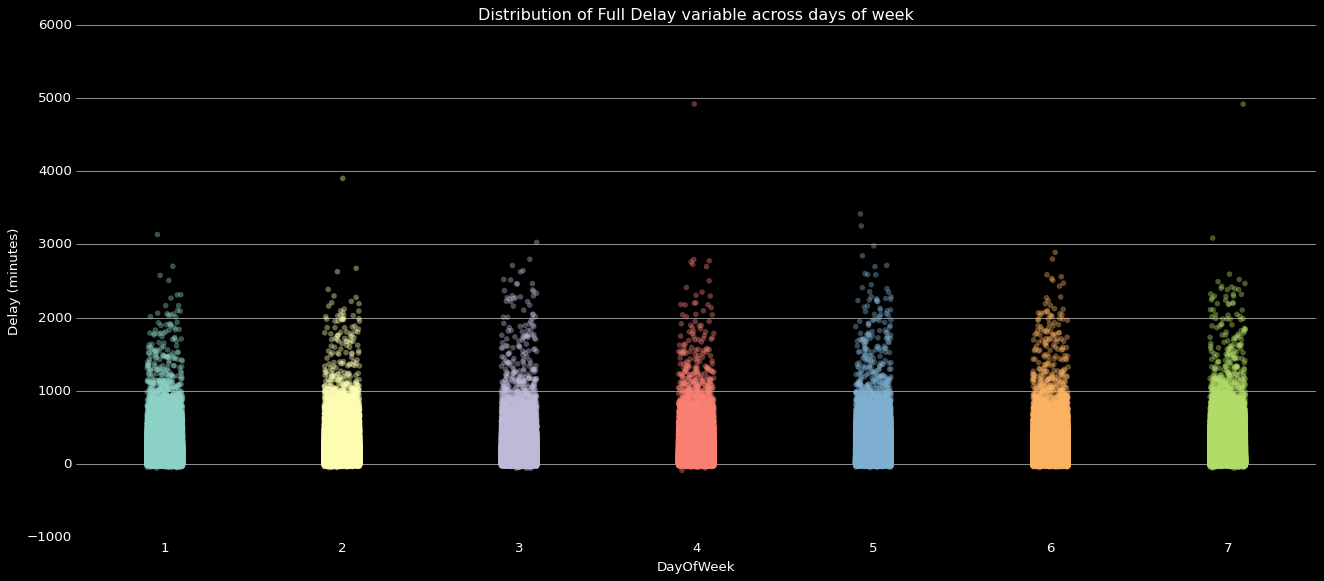

In [67]:
plot_init()
plt.title("Distribution of Full Delay variable across days of week")
sns.stripplot(x='DayOfWeek',y='full_delay', alpha=.40, data=data)
plt.ylabel("Delay (minutes)")

In [68]:
def OnTime(full_delay):
    if full_delay<15: #A flight is considered delayed when it arrived 15 or more minutes than the schedule (U.S.  Bureau of Transportation Statistics)
        return 'y'
    else:
        return 'n'
    
data['on_time'] = data['full_delay'].apply(OnTime)

In [69]:
data

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,full_delay,on_time
0,2008,1,3,4,2003.0,1955,2211.0,2225,WN,335,N712SW,128.0,150.0,116.0,-14.0,8.0,IAD,TPA,810,4.0,8.0,0,N,0,0.0,0.0,0.0,0.0,0.0,-6.0,y
1,2008,1,3,4,754.0,735,1002.0,1000,WN,3231,N772SW,128.0,145.0,113.0,2.0,19.0,IAD,TPA,810,5.0,10.0,0,N,0,0.0,0.0,0.0,0.0,0.0,21.0,n
2,2008,1,3,4,628.0,620,804.0,750,WN,448,N428WN,96.0,90.0,76.0,14.0,8.0,IND,BWI,515,3.0,17.0,0,N,0,0.0,0.0,0.0,0.0,0.0,22.0,n
3,2008,1,3,4,1829.0,1755,1959.0,1925,WN,3920,N464WN,90.0,90.0,77.0,34.0,34.0,IND,BWI,515,3.0,10.0,0,N,0,2.0,0.0,0.0,0.0,32.0,68.0,n
4,2008,1,3,4,1940.0,1915,2121.0,2110,WN,378,N726SW,101.0,115.0,87.0,11.0,25.0,IND,JAX,688,4.0,10.0,0,N,0,0.0,0.0,0.0,0.0,0.0,36.0,n
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1936753,2008,12,13,6,1250.0,1220,1617.0,1552,DL,1621,N938DL,147.0,152.0,120.0,25.0,30.0,MSP,ATL,906,9.0,18.0,0,N,0,3.0,0.0,0.0,0.0,22.0,55.0,n
1936754,2008,12,13,6,657.0,600,904.0,749,DL,1631,N3743H,127.0,109.0,78.0,75.0,57.0,RIC,ATL,481,15.0,34.0,0,N,0,0.0,57.0,18.0,0.0,0.0,132.0,n
1936755,2008,12,13,6,1007.0,847,1149.0,1010,DL,1631,N909DA,162.0,143.0,122.0,99.0,80.0,ATL,IAH,689,8.0,32.0,0,N,0,1.0,0.0,19.0,0.0,79.0,179.0,n
1936756,2008,12,13,6,1251.0,1240,1446.0,1437,DL,1639,N646DL,115.0,117.0,89.0,9.0,11.0,IAD,ATL,533,13.0,13.0,0,N,0,0.0,0.0,0.0,0.0,0.0,20.0,n


In [70]:
data['on_time'].value_counts()

n    1628963
y     299401
Name: on_time, dtype: int64

([<matplotlib.patches.Wedge at 0x7fbf349b1e10>,
 [Text(-0.9717187867828186, 0.5155216769577464, 'Delayed'),
  Text(1.104225948919815, -0.5858199840668927, 'On Time')])

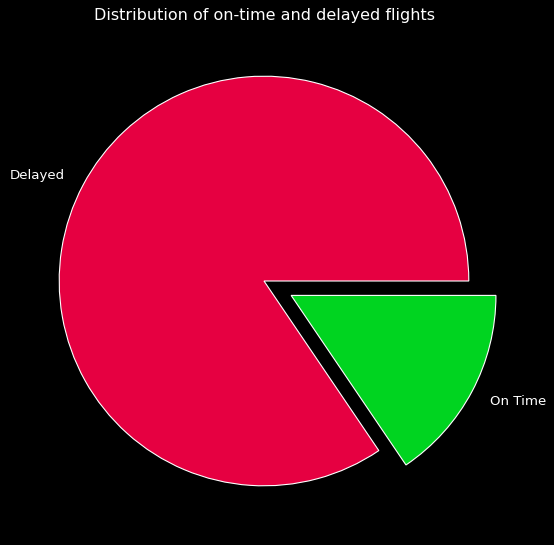

In [71]:
plot_init()
plt.title("Distribution of on-time and delayed flights")
explode = explode = (0, 0.15)
plt.pie(data['on_time'].value_counts(), labels=['Delayed','On Time'], colors=['#e60041','#00d420'], explode=explode)

In [72]:
ontime_by_carrier = data.groupby(['UniqueCarrier','on_time']).count()['full_delay'].reset_index().rename(columns={"full_delay": "count"})

In [73]:
carriers = data['UniqueCarrier'].unique()

In [74]:
duc = data['UniqueCarrier'].value_counts().reset_index()

In [75]:
for i in range(len(carriers)):
    selected_carrier = carriers[i]
    len_carrier = duc[duc['index']==selected_carrier]['UniqueCarrier'].item()
    ontime_by_carrier.loc[ontime_by_carrier.UniqueCarrier==selected_carrier,'count'] = np.array(ontime_by_carrier.loc[ontime_by_carrier.UniqueCarrier==selected_carrier,'count'])/len_carrier

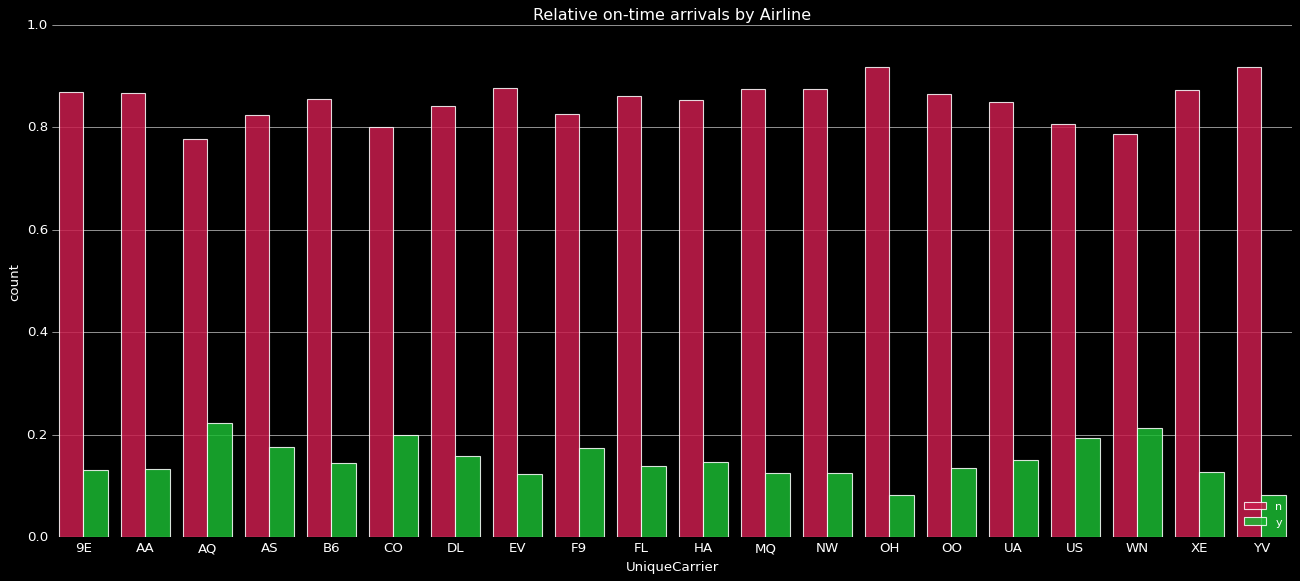

In [76]:
plot_init()
plt.title(('Relative on-time arrivals by carrier'))
sns.barplot(x='UniqueCarrier', y='count', hue='on_time', data=ontime_by_carrier, palette=['#e60041','#00d420'], alpha=.85)
plt.legend(fontsize='10', loc=4)
plt.xlabel("Carrier")

<AxesSubplot:title={'center':'Mean Full Flight Delay by Airline'}, xlabel='UniqueCarrier', ylabel='full_delay'>

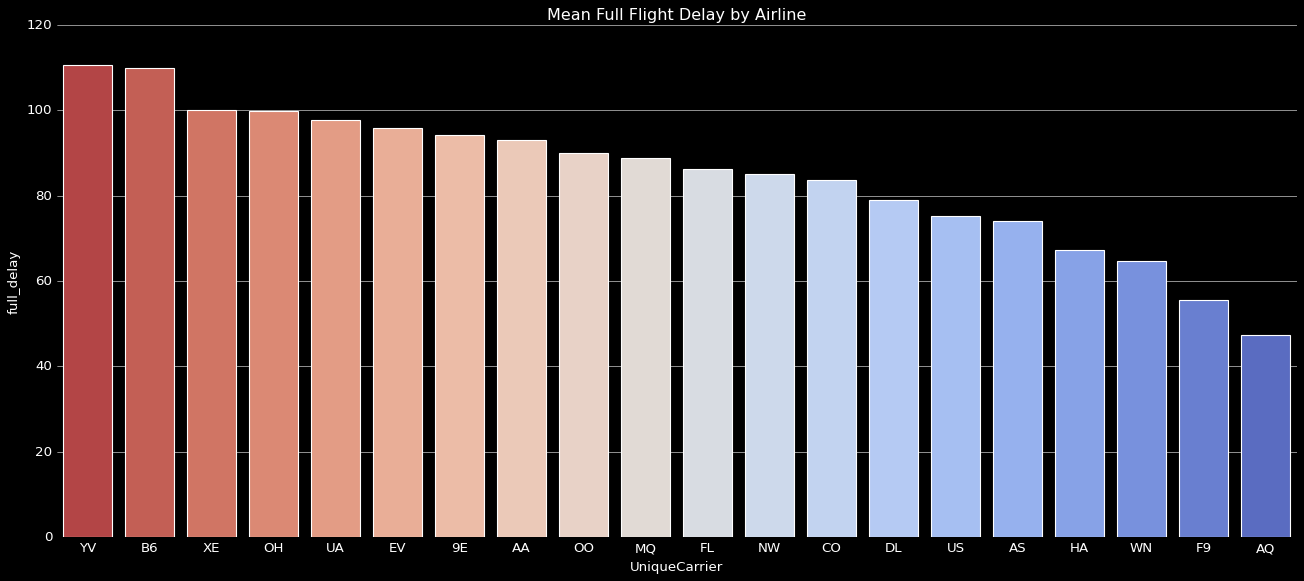

In [375]:
mean_delay_by_carrier = data.groupby('UniqueCarrier').mean()['full_delay'].reset_index().sort_values('full_delay',ascending=False)
plot_init()
plt.title("Mean Full Flight Delay by Airline")
sns.barplot(x='UniqueCarrier',y='full_delay',data=mean_delay_by_carrier, palette='coolwarm_r')
plt.ylabel("Delay (minutes)")
plt.xlabel("Carrier")

/opt/conda/lib/python3.7/site-packages/pandas/core/arraylike.py:358: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/opt/conda/lib/python3.7/site-packages/pandas/core/arraylike.py:358: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Text(0, 0.5, 'Carrier')

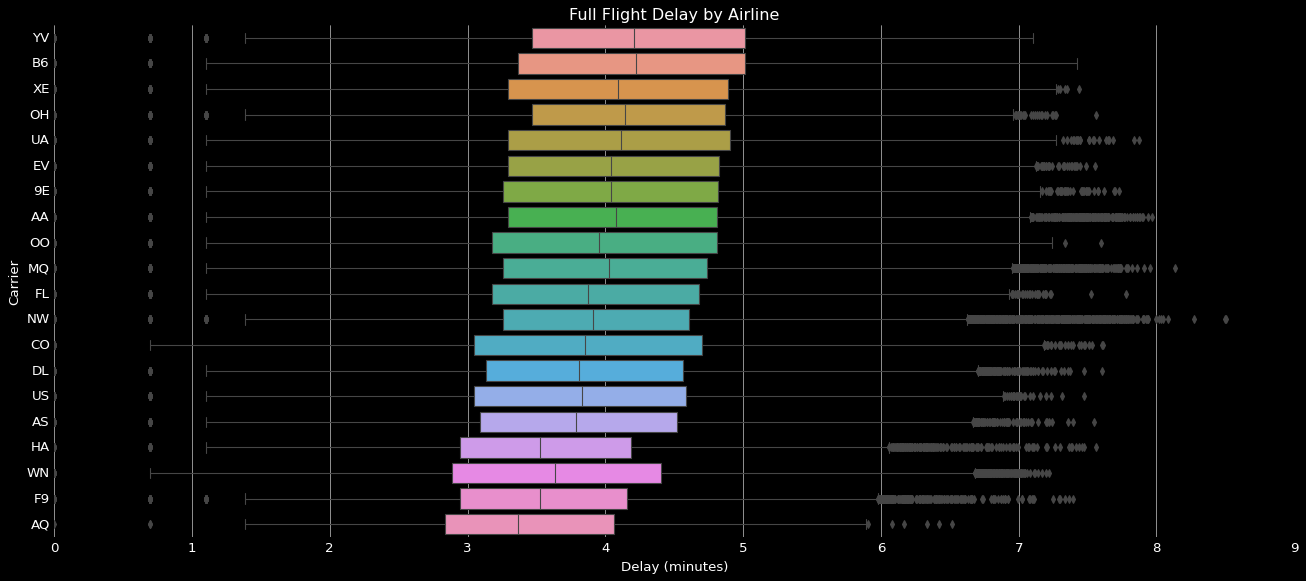

In [380]:
plot_init()
plt.title("Full Flight Delay by Airline")
sns.boxplot(y='UniqueCarrier',x=np.log(data['full_delay']),data=data, order=mean_delay_by_carrier['UniqueCarrier'])
plt.xlabel("Delay (minutes)")
plt.ylabel("Carrier")

<br>

# Modelling
Will my next flight be on time?

#### Preprocessing the data

In [328]:
X = data

In [329]:
X['Origin'] = X['Origin'].apply(lambda x: f'origin_{x}')
X['Dest'] = X['Dest'].apply(lambda x: f'destination_{x}')

In [330]:
columns_to_use = ['Month','DayofMonth','DayOfWeek','CRSDepTime','CRSArrTime','UniqueCarrier','CRSElapsedTime',
                 'Origin','Dest','Distance','on_time']
X = X[columns_to_use]

In [331]:
def OneHotEncoder(col,df):
    encoded = pd.get_dummies(df[col])
    df = df.drop(col,axis = 1)
    return pd.concat((df,encoded), axis=1)

In [332]:
X.shape

(1928364, 11)

In [333]:
X = OneHotEncoder('UniqueCarrier',X)
X = OneHotEncoder('Origin',X)
X = OneHotEncoder('Dest',X)

In [334]:
X.shape

(1928364, 633)

#### Sampling the dataset
1.9 million entries is a huge amoung of data. Time and computational resources can be saved by simply training on a statistically equivalent reduced portion of this data, that is, a sample.

In [335]:
from scipy.stats import ks_2samp

In [336]:
sample = X.sample(50000, replace=False, random_state=42)

In [337]:
sample.reset_index(inplace=True)
sample.drop('index',axis=1, inplace=True)

In [338]:
sample

,Month,DayofMonth,DayOfWeek,CRSDepTime,CRSArrTime,CRSElapsedTime,Distance,on_time,9E,AA,AQ,AS,B6,CO,DL,EV,F9,FL,HA,MQ,NW,OH,OO,UA,US,WN,XE,YV,origin_origin_ABE,origin_origin_ABI,origin_origin_ABQ,origin_origin_ABY,origin_origin_ACK,origin_origin_ACT,origin_origin_ACV,origin_origin_ACY,origin_origin_ADK,origin_origin_ADQ,origin_origin_AEX,origin_origin_AGS,origin_origin_AKN,origin_origin_ALB,origin_origin_ALO,origin_origin_AMA,origin_origin_ANC,origin_origin_ASE,origin_origin_ATL,origin_origin_ATW,origin_origin_AUS,origin_origin_AVL,origin_origin_AVP,origin_origin_AZO,origin_origin_BDL,origin_origin_BET,origin_origin_BFL,origin_origin_BGM,origin_origin_BGR,origin_origin_BHM,origin_origin_BIL,origin_origin_BIS,origin_origin_BJI,origin_origin_BLI,origin_origin_BMI,origin_origin_BNA,origin_origin_BOI,origin_origin_BOS,origin_origin_BPT,origin_origin_BQK,origin_origin_BQN,origin_origin_BRO,origin_origin_BRW,origin_origin_BTM,origin_origin_BTR,origin_origin_BTV,origin_origin_BUF,origin_origin_BUR,origin_origin_BWI,origin_origin_BZN,origin_origin_CAE,origin_origin_CAK,origin_origin_CDC,origin_origin_CDV,origin_origin_CEC,origin_origin_CHA,origin_origin_CHO,origin_origin_CHS,origin_origin_CIC,origin_origin_CID,origin_origin_CLD,origin_origin_CLE,origin_origin_CLL,origin_origin_CLT,origin_origin_CMH,origin_origin_CMI,origin_origin_CMX,origin_origin_COD,origin_origin_COS,origin_origin_CPR,origin_origin_CRP,origin_origin_CRW,origin_origin_CSG,origin_origin_CVG,origin_origin_CWA,origin_origin_DAB,origin_origin_DAL,origin_origin_DAY,origin_origin_DBQ,origin_origin_DCA,origin_origin_DEN,origin_origin_DFW,origin_origin_DHN,origin_origin_DLG,origin_origin_DLH,origin_origin_DRO,origin_origin_DSM,origin_origin_DTW,origin_origin_EGE,origin_origin_EKO,origin_origin_ELM,origin_origin_ELP,origin_origin_ERI,origin_origin_EUG,origin_origin_EVV,origin_origin_EWN,origin_origin_EWR,origin_origin_EYW,origin_origin_FAI,origin_origin_FAR,origin_origin_FAT,origin_origin_FAY,origin_origin_FCA,origin_origin_FLG,origin_origin_FLL,origin_origin_FLO,origin_origin_FNT,origin_origin_FSD,origin_origin_FSM,origin_origin_FWA,origin_origin_GCC,origin_origin_GEG,origin_origin_GFK,origin_origin_GGG,origin_origin_GJT,origin_origin_GNV,origin_origin_GPT,origin_origin_GRB,origin_origin_GRK,origin_origin_GRR,origin_origin_GSO,origin_origin_GSP,origin_origin_GST,origin_origin_GTF,origin_origin_GTR,origin_origin_GUC,origin_origin_HDN,origin_origin_HHH,origin_origin_HLN,origin_origin_HNL,origin_origin_HOU,origin_origin_HPN,origin_origin_HRL,origin_origin_HSV,origin_origin_HTS,origin_origin_IAD,origin_origin_IAH,origin_origin_ICT,origin_origin_IDA,origin_origin_ILM,origin_origin_IND,origin_origin_INL,origin_origin_IPL,origin_origin_ISP,origin_origin_ITH,origin_origin_ITO,origin_origin_IYK,origin_origin_JAC,origin_origin_JAN,origin_origin_JAX,origin_origin_JFK,origin_origin_JNU,origin_origin_KOA,origin_origin_KTN,origin_origin_LAN,origin_origin_LAS,origin_origin_LAW,origin_origin_LAX,origin_origin_LBB,origin_origin_LCH,origin_origin_LEX,origin_origin_LFT,origin_origin_LGA,origin_origin_LGB,origin_origin_LIH,origin_origin_LIT,origin_origin_LMT,origin_origin_LNK,origin_origin_LRD,origin_origin_LSE,origin_origin_LWB,origin_origin_LWS,origin_origin_LYH,origin_origin_MAF,origin_origin_MBS,origin_origin_MCI,origin_origin_MCN,origin_origin_MCO,origin_origin_MDT,origin_origin_MDW,origin_origin_MEI,origin_origin_MEM,origin_origin_MFE,origin_origin_MFR,origin_origin_MGM,origin_origin_MHT,origin_origin_MIA,origin_origin_MKE,origin_origin_MKG,origin_origin_MLB,origin_origin_MLI,origin_origin_MLU,origin_origin_MOB,origin_origin_MOD,origin_origin_MOT,origin_origin_MQT,origin_origin_MRY,origin_origin_MSN,origin_origin_MSO,origin_origin_MSP,origin_origin_MSY,origin_origin_MTJ,origin_origin_MYR,origin_origin_OAJ,origin_origin_OAK,origin_origin_OGG,origin_origin_OKC,origin_origin_OMA,origin_origin_OME,origin_origin_ONT,origin_origin_ORD,origin_origin_ORF,origin_origin_OTH,origin_origin_OTZ,origin

In [339]:
dcolumns = sample.columns

In [340]:
for i in range(len(dcolumns)):
    sample_distribution = sample[dcolumns[i]]
    population_distribution = X[dcolumns[i]]
    ks = ks_2samp(sample_distribution, population_distribution)
    pvalue = ks[1]
    if pvalue<=0.25:
        print(f"[{dcolumns[i]}]  -  p-value: {pvalue} (low value alert)")

/opt/conda/lib/python3.7/site-packages/scipy/stats/_ksstats.py:162: RuntimeWarning: overflow encountered in matmul
  Hpwr = np.matmul(Hpwr, H)


[destination_destination_BGR]  -  p-value: 0.0 (low value alert)
[destination_destination_STT]  -  p-value: 0.0 (low value alert)


The loop tested the <b>Kolmogorov-Smirnov</b> test for each variable in the dataset, and in all important instances(*) it failed to reject the null hypothesis that the sample has the same distribution of the population. Then so, the sample can be confidently used in order to obtain the same results that would've been obtained with the full dataset, and with only 2.60% of the original rows.

(*) Given that the test only failed on just 2 destination airports, it is not considered really important for the sake of modelling.

In [341]:
X.columns

Index(['Month', 'DayofMonth', 'DayOfWeek', 'CRSDepTime', 'CRSArrTime',
       'CRSElapsedTime', 'Distance', 'on_time', '9E', 'AA',
       ...
       'destination_destination_TYR', 'destination_destination_TYS',
       'destination_destination_VLD', 'destination_destination_VPS',
       'destination_destination_WRG', 'destination_destination_WYS',
       'destination_destination_XNA', 'destination_destination_YAK',
       'destination_destination_YKM', 'destination_destination_YUM'],
      dtype='object', length=633)

In [342]:
X = sample

In [343]:
X['on_time'].value_counts()/len(X)

n    0.84654
y    0.15346
Name: on_time, dtype: float64

In [344]:
X['on_time'].head(15)

0     n
1     n
2     y
3     n
4     n
5     n
6     n
7     n
8     n
9     n
10    n
11    n
12    y
13    n
14    n
Name: on_time, dtype: object

In [345]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
X['on_time'] = encoder.fit_transform(X['on_time'])

In [346]:
X['on_time'].head(15)

0     0
1     0
2     1
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    1
13    0
14    0
Name: on_time, dtype: int64

Target classes are imbalanced, 

In [347]:
y = X['on_time']
X.drop("on_time", axis=1, inplace=True)

In [348]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [349]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(sampling_strategy='minority', random_state=42)
X_train_oversampled, y_train_oversampled = sm.fit_resample(X_train,y_train)
X_test_oversampled, y_test_oversampled = sm.fit_resample(X_test,y_test)

In [350]:
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report

#### Delayed/On Time Flight Prediction (Classification)

In [351]:
from sklearn.svm import LinearSVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

linearsvc = make_pipeline(StandardScaler(),
                                        LinearSVC(random_state=42))

In [352]:
linearsvc.fit(X_train_oversampled,y_train_oversampled)

/opt/conda/lib/python3.7/site-packages/sklearn/svm/_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearsvc', LinearSVC(random_state=42))])

In [353]:
y_pred = linearsvc.predict(X_test_oversampled)

In [354]:
f1_score(y_pred,y_test_oversampled)

0.8747784997046663

In [355]:
classification_report(y_pred,y_test_oversampled)


'              precision    recall  f1-score   support\n\n           0       0.95      0.84      0.89     14497\n           1       0.81      0.95      0.87     10969\n\n    accuracy                           0.88     25466\n   macro avg       0.88      0.89      0.88     25466\nweighted avg       0.89      0.88      0.88     25466\n'

This is a very good model, it is able to correctly predict whether your next airpline be delayed or not. It would be great if the model could throw probabilities for a more precise prediction.

In [356]:
from sklearn.calibration import CalibratedClassifierCV

In [357]:
probab_classifier = CalibratedClassifierCV(base_estimator=linearsvc, cv=3)

In [358]:
probab_classifier.fit(X_train_oversampled, y_train_oversampled)

/opt/conda/lib/python3.7/site-packages/sklearn/svm/_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/svm/_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/svm/_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


CalibratedClassifierCV(base_estimator=Pipeline(steps=[('standardscaler',
                                                       StandardScaler()),
                                                      ('linearsvc',
                                                       LinearSVC(random_state=42))]),
                       cv=3)

In [359]:
y_pred = probab_classifier.predict(X_test_oversampled)
f1_score(y_pred,y_test_oversampled)

0.8888212530979608

In [360]:
to_test = np.array(X_test.iloc[50]).reshape(1,-1)

In [383]:
X_test.iloc[50].head(15)

Month                1.0
DayofMonth           1.0
DayOfWeek            2.0
CRSDepTime        1640.0
CRSArrTime        1745.0
CRSElapsedTime      65.0
Distance           247.0
9E                   0.0
AA                   1.0
AQ                   0.0
AS                   0.0
B6                   0.0
CO                   0.0
DL                   0.0
EV                   0.0
Name: 24712, dtype: float64

In [362]:
probab_classifier.predict_proba(to_test)

array([[0.86885523, 0.13114477]])

In [385]:
mean_delay_by_carrier[mean_delay_by_carrier['UniqueCarrier']=='AA']

,UniqueCarrier,full_delay
1,AA,92.957095


Given the pre-departure known information for this flight, the model predicts **86.88%** probabilities of it <i>not</i> being on time and **13.11%** of it being on time. The airline its **AA**, whose average delay time is **~93 mins**. This is the useful kind of information that the customer would definitely want to know when picking a flight.